# GFC Credit Score Classification Walkthrough
------------------

This project aims to leverage the power of data science to solve a real-world problem. By using various statistical and machine learning techniques, we will analyze a large dataset to uncover hidden patterns and relationships between variables. Through this analysis, I hope to gain new insights that can inform decision-making and lead to actionable outcomes.

The project will involve several phases, including data collection, cleaning, and preprocessing, exploratory data analysis, model building, and evaluation. I will use various tools and technologies, such as Python, SQL, and visualization libraries to facilitate this process, this phases will be introducted as Machine Learning workflow and goals.

Overall, the purpose of this notebook is to guide through a typical checklist for an end-to-end data science project and demonstrate my thought process while solving a problem, in this case I am going to be working with a real life problem from an anonymized GFC (Global Finance Company).

My goal with this project it's to implement a prediction model and solve the problem the most efficient way posible, taking into account the cost of deployment and score of the trained model. For this, I am not looking for a perfect score but rather looking a sustainable model and cost efficient for the GFC.

# Machine Learning Workflow
--------------------------------------
Since I am dealing with a real life problem, I must implement a workflow to keep everything simple and having a clear goal to approach and reach.

As usual, in my particular case the Machine Learning Workflow will have 7 sections:

1. Question or problem definition.

2. Acquire training and testing data.

3. Wrangle, prepare, cleanse the data.

4. Analyze, identify patterns, and explore the data.

5. Model, predict and solve the problem.

6. Visualize, report, and present the problem solving steps and final solution.

7. Supply or submit the results.

It is important to say that having a clear mindset through the entire notebook may implied combining multiple workflow stages, perform a stage earlier than indicated or perfom a stage multiple times in our workflow.

This would not change the main goal of the project or the approach we are trying to implement.

# Workflow goals
-----------------------------------

As a data scientist I will use every tool available to provide a solution for seven major goals:

**1. Classifying:** I may want to classify or categorize our samples. I may also want to understand the implications or correlation of different classes with our solution goal.

**2. Correlating:** The problem need to be solved based on available features within the training dataset, so it is importan to ask: Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset.

**3. Converting:** Depending on the choice of model algorithm I may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**4. Complementing:** Data preparation may also require me to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**5. Correcting:** I may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors (Outliers).

**6. Creating:** I could create new features based on an existing feature or a set of features if I need to, such that the new feature follows the correlation, conversion and completeness goals.

**7. Charting:** Select the right visualization plots and charts depending on nature of the data and the solutions goals.

# Question or problem definition
--------------
## Problem description

Over the years, the GFC has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.


## Project objective

Given a person’s credit-related information, build a machine learning model that can classify the credit score.

# Acquire training and testing data
--------------

## Load importan libraries

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
init_notebook_mode(connected=True)
sns.set_style('whitegrid')
pd.set_option('display.float_format', '{:.2f}'.format) # Option to avoid scientific notation
%matplotlib inline

## Load project data

In [2]:
train_data = pd.read_csv('Data/train.csv.zip')

test_data = pd.read_csv('Data/test.csv.zip')

# Wrangle, prepare, cleanse the data
----------

## Understanding the data information

### Train data

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

### Test data

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

# Understanding the data

### Features data dictionary

**ID:**
Represents a unique identification of an entry

**Customer_ID:**
Represents a unique identification of a person

**Month:**
Represents the month of the year

**Name:**
Represents the name of a person

**Age:**
Represents the age of the person

**SSN:**
Represents the social security number of a person

**Occupation:**
Represents the occupation of the person

**Annual_Income:**
Represents the annual income of the person

**Monthly_Inhand_Salary:**
Represents the monthly base salary of a person

**Num_Bank_Accounts:**
Represents the number of bank accounts a person holds

**Num_Credit_Card:**
Represents the number of other credit cards held by a person

**Interest_Rate:**
Represents the interest rate on credit card

**Num_of_Loan:**
Represents the number of loans taken from the bank

**Type_of_Loan:**
Represents the types of loan taken by a person

**Delay_from_due_date:**
Represents the average number of days delayed from the payment date

**Num_of_Delayed_Payment:**
Represents the average number of payments delayed by a person

**Changed_Credit_Limit:**
Represents the percentage change in credit card limit

**Num_Credit_Inquiries:**
Represents the number of credit card inquiries

**Credit_Mix:**
Represents the classification of the mix of credits

**Outstanding_Debt:**
Represents the remaining debt to be paid (in USD)

**Credit_Utilization_Ratio:**
Represents the utilization ratio of credit card

**Credit_History_Age:**
Represents the age of credit history of the person

**Payment_of_Min_Amount:**
Represents whether only the minimum amount was paid by the person

**Total_EMI_per_month:**
Represents the monthly EMI payments (in USD)

**Amount_invested_monthly:**
Represents the monthly amount invested by the customer (in USD)

**Payment_Behaviour:**
Represents the payment behavior of the customer (in USD)

**Monthly_Balance:**
Represents the monthly balance amount of the customer (in USD)

**Credit_Score:**
Represents the bracket of credit score (Poor, Standard, Good)

## Understanding the data structure

### train data

In [5]:
train_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.00,_,809.98,26.82,22 Years and 1 Months,No,49.57,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.00,Good,809.98,31.94,NaN,No,49.57,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.00,Good,809.98,28.61,22 Years and 3 Months,No,49.57,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.00,Good,809.98,31.38,22 Years and 4 Months,No,49.57,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.00,Good,809.98,24.80,22 Years and 5 Months,No,49.57,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


### test data

In [6]:
test_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.00,Good,809.98,35.03,22 Years and 9 Months,No,49.57,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.00,Good,809.98,33.05,22 Years and 10 Months,No,49.57,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.00,Good,809.98,33.81,NaN,No,49.57,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.00,Good,809.98,32.43,23 Years and 0 Months,No,49.57,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.00,Good,605.03,25.93,27 Years and 3 Months,No,18.82,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


Both test and train data have the same structure, train data have an additional column that is the target (Credit_Score). From the train head I can see an age of -500, that probably an arbitrary method of missing values imputation, we can also see some Occupation filled with arbitrary methods too. It seems like the data needs a lot of transformations to be made.

## Data Cleanse

In order to analyze this data we need to fix this issues in the data and them complete the data in those missing values.

### Age

Age values are not integers and they used an arbitrary imputation method, this means that I will find values higher than 100 and lower than 1. Also there is some values with an underline at the end, first I will delete this underline then convert the values to integer and then filling thos arbitrary values with NaN in other to fill them in the completing section.

In [7]:
# Deleting "_" and converting to int()

train_data['Age'] = train_data['Age'].apply(lambda value: int(value[:-1]) if '_' in value else int(value))

test_data['Age'] = test_data['Age'].apply(lambda value: int(value[:-1]) if '_' in value else int(value))

In [8]:
# Amount of arbitrary values

print(f"Train data values higher than 100: {train_data[train_data['Age'] > 100].count().iloc[0]}")
print(f"Train data values lower than 1: {train_data[train_data['Age'] < 1].count().iloc[0]}")
print('-' * 40)
print(f"Test data values higher than 100: {test_data[test_data['Age'] > 100].count().iloc[0]}")
print(f"Test data values lower than 1: {test_data[test_data['Age'] < 1].count().iloc[0]}")

Train data values higher than 100: 1890
Train data values lower than 1: 886
----------------------------------------
Test data values higher than 100: 937
Test data values lower than 1: 464


I can see there is a few arbitrary values, are these common? It really depends of the context, usually arbitrary values are use when systems do not allow NaN values in the submission. So data entry's use arbitrary values, but there is some situations where arbitrary values are use to flag some observations because they might have value to the model prediction. 

Before I remove them I will check if arbitrary values have something to do with our target. For that I will create a column in the train dataset with a 1 if that age is an arbitrary value and 0 if not. Then I will plot them with our target.

In [9]:
train_data['Age_Arbitrary'] = train_data['Age'].apply(
    lambda value: 'Arbitrary' if value > 100 or value < 1 else 'Non-Arbitrary')

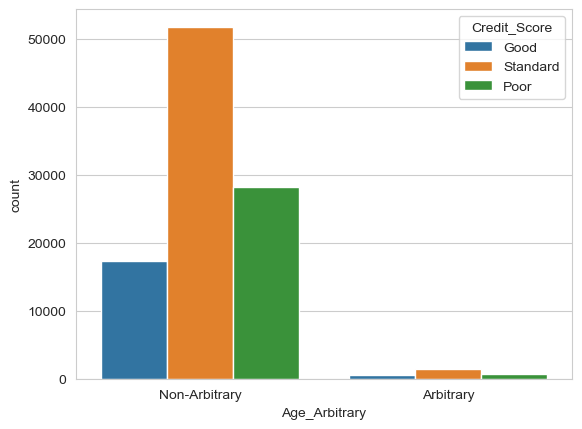

In [10]:
sns.countplot(x = 'Age_Arbitrary', hue = 'Credit_Score', data = train_data);

With the graph I see that arbitrary values follows the same distribution as the non-arbitrary values, with this I can confirm that those arbitrary values are just for NaN filling and they do not flag anything special about our data. I am gonna repleace them with NaN in order to fill them up later.

In [11]:
# Drop 'Age_Arbitrary' column.

train_data.drop('Age_Arbitrary', axis = 1, inplace = True)

In [12]:
# Replacing Arbitrary values with NaN

train_data['Age'] = train_data['Age'].apply(lambda value: np.nan if value > 100 or value < 1 else value)

test_data['Age'] = test_data['Age'].apply(lambda value: np.nan if value > 100 or value < 1 else value)

### Occupation

Some Occupations are filled with an underline, this is probably due to the same reason Age had some arbitrary values. Because the system does not allow the data entry to send NaN values, In order to verify if this is true I will apply the same method I used for Age, try to see if theres a pattern in those values that are an underline.

In [13]:
train_data['Occupation_Arbitrary'] = train_data['Occupation'].apply(
    lambda value: 'Arbitrary' if value == '_______' else 'Non-arbitrary')

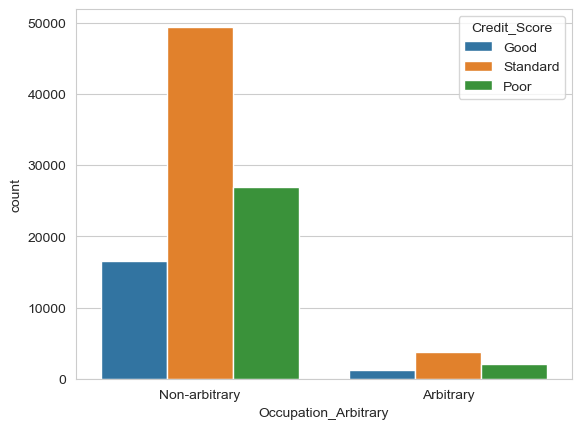

In [14]:
sns.countplot(x = 'Occupation_Arbitrary', hue = 'Credit_Score', data = train_data);

Just as I expected, there no flag reason for that underline. In this case we are safe to imput a value like Other for that particular value.

In [15]:
# Drop 'Occupation_Arbitrary' column

train_data.drop('Occupation_Arbitrary', axis = 1, inplace = True)

In [16]:
# Replacing _______ with Other

train_data['Occupation'] = train_data['Occupation'].apply(lambda value: 'Other' if value == '_______' else value)

test_data['Occupation'] = test_data['Occupation'].apply(lambda value: 'Other' if value == '_______' else value)

### Annual_Income

Annual income is not an string and it also have underlines at the end of some numbers, in this case we dont need to worry about flagged since these underlines are just for completing the numbers. I will remove the underlines and convert to integer.

In [17]:
# Deleting "_" and converting to float()

train_data['Annual_Income'] = train_data['Annual_Income'].apply(
    lambda value: float(value[:-1]) if '_' in value else float(value))

test_data['Annual_Income'] = test_data['Annual_Income'].apply(
    lambda value: float(value[:-1]) if '_' in value else float(value))

### Num_Bank_Accounts

Num Bank has a lot of arbitray values, from looking at the value_counts() I noticed that the limit point was 43, after 43 less than 3 observatons had higher values. So I'll set 43 as our limit, firts of all I will check if there is any reason why those values are flag as an arbitrary value just like I did with age and occupation.

In [18]:
train_data['Num_Bank_Accounts_Arbitrary'] = train_data['Num_Bank_Accounts'].apply(
    lambda value: 'Arbitrary' if value > 43 or value < 0 else 'Non-arbitrary')

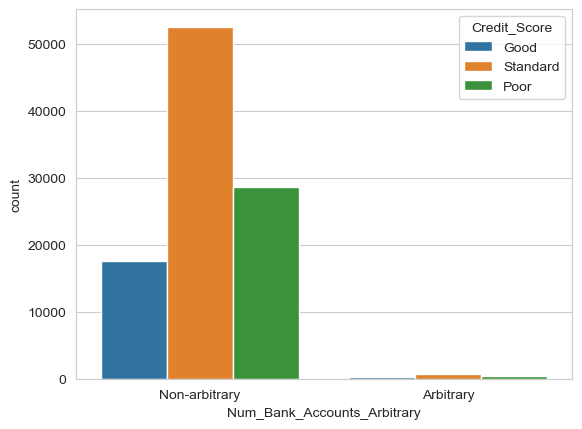

In [19]:
sns.countplot(x = 'Num_Bank_Accounts_Arbitrary', hue = 'Credit_Score', data = train_data);

From now I can confirm that there is no pattern in the Arbitrary imputation used by these data entry's. I can also confirm that it is just for filling NaN values, so for no on I will not check if the rest of the data have reasons to be flag as an Arbitrary value, I will just change them for Nan values for future filling. 

In [20]:
# Drop 'Occupation_Arbitrary' column

train_data.drop('Num_Bank_Accounts_Arbitrary', axis = 1, inplace = True)

In [21]:
# Replacing Arbitrary values with NaN

train_data['Num_Bank_Accounts'] = train_data['Num_Bank_Accounts'].apply(
    lambda value: np.nan if value > 43 or value < 0 else value)

test_data['Num_Bank_Accounts'] = test_data['Num_Bank_Accounts'].apply(
    lambda value: np.nan if value > 43 or value < 0 else value)

### Num_Credit_Card

The number of credit cards also has a lot of arbitrary values, the limit point is 92 from the value_counts() and boxplot, so Ill set that as the limit, as I said before I will not check for reasons of flagged values since none of the others showed any.

In [22]:
# Replacing Arbitrary values with NaN

train_data['Num_Credit_Card'] = train_data['Num_Credit_Card'].apply(lambda value: np.nan if value > 92 else value)

test_data['Num_Credit_Card'] = test_data['Num_Credit_Card'].apply(lambda value: np.nan if value > 92 else value)

### Interest_Rate

Interest_Rate also have many arbitrary values, our limit point from the value_counts() is 34.

In [23]:
# Replacing Arbitrary values with NaN

train_data['Interest_Rate'] = train_data['Interest_Rate'].apply(lambda value: np.nan if value > 34 else value)

test_data['Interest_Rate'] = test_data['Interest_Rate'].apply(lambda value: np.nan if value > 34 else value)

### Num_of_Loan

Num of loans its not an integer and it also has the underline at the end. I will remove and convert to integer, then I will change the arbitrary values to NaN.

In [24]:
# Deleting "_" and converting to int()

train_data['Num_of_Loan'] = train_data['Num_of_Loan'].apply(lambda value: int(value[:-1]) if '_' in value else int(value))

test_data['Num_of_Loan'] = test_data['Num_of_Loan'].apply(lambda value: int(value[:-1]) if '_' in value else int(value))

From the boxplot and value_counts() the limit of loans it's 23.

In [25]:
# Replacing Arbitrary values with NaN

train_data['Num_of_Loan'] = train_data['Num_of_Loan'].apply(lambda value: np.nan if value > 23 or value < 0 else value)

test_data['Num_of_Loan'] = test_data['Num_of_Loan'].apply(lambda value: np.nan if value > 23 or value < 0 else value)

### Num_of_Delayed_Payment

Num_of_Delayed_Payment has also an underline and it is not an integer, besides that it also has many arbitrary introduced values and it also has many NaN values, if I understand the column having a NaN value it's because there is no delayed payment, so if there is already an NaN value I will set it to 0, then I will fill later the NaN values generated from the arbitrary values. 

In [26]:
# Deleting "_", setting current NaN to 0 and converting to int()

def ConvertIntWithNan(value):
    
    if type(value) == type(str()):
        
        return int(value[:-1]) if '_' in value else int(value)

    return 0

train_data['Num_of_Delayed_Payment'] = train_data['Num_of_Delayed_Payment'].apply(ConvertIntWithNan)

test_data['Num_of_Delayed_Payment'] = test_data['Num_of_Delayed_Payment'].apply(ConvertIntWithNan)

I determined from the boxplot and value_counts that 28 is the cut point, so I will use it as a limit. In this case I will let the negative values stay because they might mean something (I am gonna look at that in the EDA)

In [27]:
# Replacing Arbitrary values with NaN

train_data['Num_of_Delayed_Payment'] = train_data['Num_of_Delayed_Payment'].apply(
    lambda value: np.nan if value > 28 else value)

test_data['Num_of_Delayed_Payment'] = test_data['Num_of_Delayed_Payment'].apply(
    lambda value: np.nan if value > 28 else value)

### Changed_Credit_Limit

Changed credit is not a float and it does not have arbitrary values (I can notice that because we are talking about percentage changes and the values are ranging from 0 to 100) but it has some values that had an underline, I might to give them a look.

In [28]:
train_data[train_data['Changed_Credit_Limit'] == '0'][['ID', 'Customer_ID']]

,ID,Customer_ID


The colum have no zeros. This means that the underline in the data was submitted when the client never changed its credit limit. So I am gonna replace that with 0.

In [29]:
train_data['Changed_Credit_Limit'] = train_data['Changed_Credit_Limit'].apply(
    lambda value: 0.0 if '_' in value else float(value))

test_data['Changed_Credit_Limit'] = test_data['Changed_Credit_Limit'].apply(
    lambda value: 0.0 if '_' in value else float(value))

### Num_Credit_Inquiries

Number of credit inquiries have a lot of arbitrary values, I noticed easily the cut off point which is around 53. So I am gonna change the values to NaN.

In [30]:
train_data['Num_Credit_Inquiries'] = train_data['Num_Credit_Inquiries'].apply(
    lambda value: np.nan if value > 53 else value)

test_data['Num_Credit_Inquiries'] = test_data['Num_Credit_Inquiries'].apply(
    lambda value: np.nan if value > 53 else value)

### Credit_Mix

Credit_Mix has an underline value, since the credit in the dataset are classified by good, standard or bad, this underline is probably because the client did not have any other credit account but in order to this be true there has to be no Credit Inquiries and no credit history. In order to see if this underline has any value or it is just missing data, I can plot it in a barplot.

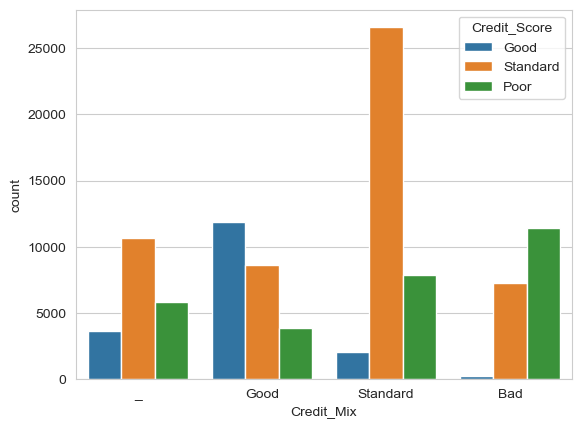

In [31]:
sns.countplot(x = 'Credit_Mix', hue = 'Credit_Score', data = train_data);

This is interesting because there is an expected pattern, good credit_mix has more good credit_score values, standard credit_mix has more standard credit_score values and bad credit_mix has more poor credit_score values. Our underline value has more standard values and it looks just like the Credit_mix Standard Distribution. This means the better fit for that data it's labelled as Standard. Are we safe to do that? It is way better filling values in with an indicator than do it with the basic imputation methods.

I am gonna perform an stage earlier for this particular column, I am gonna change _ for Standard.

In [32]:
train_data['Credit_Mix'] = train_data['Credit_Mix'].apply(lambda value: "Standard" if value == "_" else value)

test_data['Credit_Mix'] = test_data['Credit_Mix'].apply(lambda value: "Standard" if value == "_" else value)

### Outstanding_Debt

Outstanding debt it's not a float and it also has some underlines in the data, it is hard to see if there is any arbitrary imputed method since it's a column describing money amounts. For now I am gonna apply the same method I have been applying for all the variables.

In [33]:
# Deleting "_" and converting to float()

train_data['Outstanding_Debt'] = train_data['Outstanding_Debt'].apply(
    lambda value: float(value[:-1]) if '_' in value else float(value))

test_data['Outstanding_Debt'] = test_data['Outstanding_Debt'].apply(
    lambda value: float(value[:-1]) if '_' in value else float(value))

### Credit_History_Age

In order to clean this variable we have to implement some feature engineering, for now I will leave it like that.

### Amount_invested_monthly

Amount_invested_monthly have some values with underlines (Probably arbitrary value because of the distribution) and I need to transform it into a float in order to be analysed.

In [34]:
train_data['Amount_invested_monthly'] = train_data['Amount_invested_monthly'].apply(
    lambda value: np.nan if value == '__10000__' else float(value))

test_data['Amount_invested_monthly'] = test_data['Amount_invested_monthly'].apply(
    lambda value: np.nan if value == '__10000__' else float(value))

### Payment_Behaviour

There is a kind of arbitrary imputed value with the name of '!@9#%8', does this value have any kind of importance to the data or is just missing data?

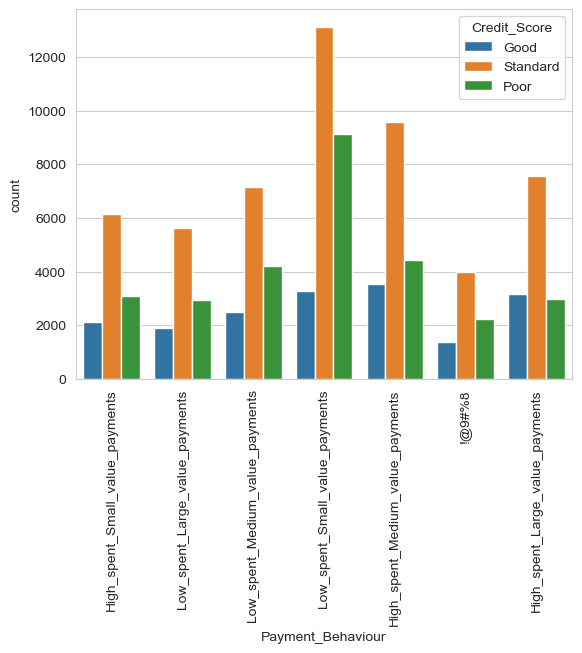

In [35]:
sns.countplot(x = 'Payment_Behaviour', hue = 'Credit_Score', data = train_data)

plt.xticks(rotation = 90);

Since those values are the smallest portion of the column, I will append them to the 'Low_spent_Small_value_payments'value, it is important to know that in case of bad performance of the model I can go back and remove these decisions I took and see if filling those values or removing them will improve the models performance.

In [36]:
train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].apply(
    lambda value: 'Low_spent_Small_value_payments' if value == '!@9#%8' else value)

test_data['Payment_Behaviour'] = test_data['Payment_Behaviour'].apply(
    lambda value: 'Low_spent_Small_value_payments' if value == '!@9#%8' else value)

### Monthly_Balance

Monthly_Balance have some arbitrary values that need to be fixed and the others need to be converted to float.

In [37]:
train_data['Monthly_Balance'] = train_data['Monthly_Balance'].apply(
    lambda value: np.nan if value == '__-333333333333333333333333333__' else float(value))

test_data['Monthly_Balance'] = test_data['Monthly_Balance'].apply(
    lambda value: np.nan if value == '__-333333333333333333333333333__' else float(value))

## Re-organized

It is good for feature importance and EAD to have the dataset organized.

In [38]:
train_data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [39]:
cols = ['ID', 'Customer_ID', 'SSN', 'Month', 'Name', 'Age', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Mix',
       'Credit_Score']

train_data = train_data[cols]

test_data = test_data[cols[:-1]]

## Completing the data

In this stage I am going to be solving the problem of Missing Values in a Dataset. Model algorithms may work best when there are no missing values, since if missing values are filled in a proper way, I am technically not losing any value.

I have to take into consideration that I have already filled in values for 'Payment_Behaviour' and 'Credit_Mix'

### Data missing values approach

In the data I notice to have way too much missing values, this is because I removed all those arbitrary values and changed them into NaN. I will need to create an approach for filling those values in. 

In [40]:
# Training dataset -----------------------------------------------------------------------------------------------

TrainMissingValues = pd.DataFrame(train_data.isnull().sum()).sort_values(by = 0, 
                                                    ascending = False)[:13]

TrainMissingValues.rename(columns = {0 : 'Train Missing'}, inplace = True, errors = 'raise')

TrainMissingValues['Train Missing %'] = round(TrainMissingValues['Train Missing'] / train_data.shape[0] * 100, 2)

# Test dataset -----------------------------------------------------------------------------------------------

TestMissingValues = pd.DataFrame(test_data.isnull().sum()).sort_values(by = 0, 
                                                    ascending = False)[:13]

TestMissingValues.rename(columns = {0 : 'Test Missing'}, inplace = True, errors = 'raise')

TestMissingValues['Test Missing %'] = round(TestMissingValues['Test Missing'] / test_data.shape[0] * 100, 2)

# Concat -----------------------------------------------------------------------------------------------

MissingDataApproach = pd.concat([TrainMissingValues, TestMissingValues], axis = 1)

MissingDataApproach

,Train Missing,Train Missing %,Test Missing,Test Missing %
Monthly_Inhand_Salary,15002,15.00,7498,15.00
Type_of_Loan,11408,11.41,5704,11.41
Name,9985,9.98,5015,10.03
Credit_History_Age,9030,9.03,4470,8.94
Amount_invested_monthly,8784,8.78,4446,8.89
Num_of_Loan,4343,4.34,2232,4.46
Num_Credit_Inquiries,3593,3.59,1876,3.75
Age,2776,2.78,1401,2.80
Num_Credit_Card,2139,2.14,1115,2.23
Interest_Rate,2034,2.03,966,1.93


In [41]:
MissingDataApproach[['Train Missing', 'Test Missing']].sum()

Train Missing    72343
Test Missing     36328
dtype: int64

The training data has 75k missing values (I introduced most of them in the data cleaning) and the testing data has close to 38k missing values, for this reason I have to implement a strong method for imputation. I have decided to use KNN Imputation for my numerical observations since its one of the most accurate methods, but I also need to know that the accuracy of KNN imputation for missing data can depend on a variety of factors, such as the amount and pattern of missing data, the size of the dataset, the number of neighbors considered in the imputation, and the similarity metric used to determine neighborliness.

One thing to keep in mind is that KNN imputation can introduce bias if the missing data is not missing completely at random (MCAR) or missing at random (MAR), meaning that the missingness is not related to the value of the missing data. In such cases, KNN imputation may produce biased estimates of the missing data values.

So in order to implement this method, I need to be sure that the missing data is MCAR or MAR. There are a few ways to check if your missing data is not missing completely at random (MCAR) or missing at random (MAR):

**Visual inspection:** You can plot the missing values to see if there is a pattern to their occurrence. For example, if missing values tend to occur more often in certain rows or columns, or in certain values of other variables, this may indicate that the missingness is not random.

**Statistical tests:** You can perform statistical tests to check for patterns in the missing data. One common test is the Little's MCAR test, which tests whether the missingness is independent of the observed data. If the p-value of the test is less than 0.05, it indicates that the data is not MCAR.

Let's check if our missing data its MCAR or MAR and fill the values in case data is MNAR


#### Visual inspection

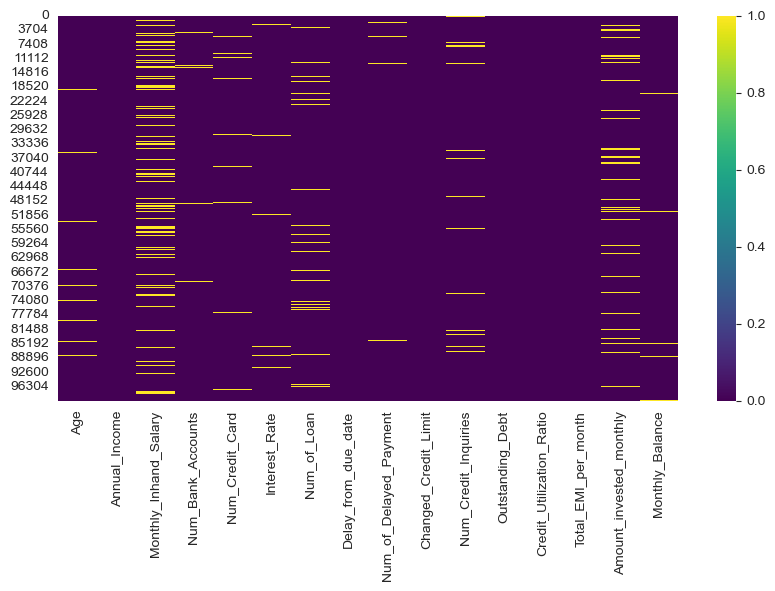

In [42]:
plt.figure(figsize = (10, 5))

sns.heatmap(train_data.select_dtypes(include = ['float64', 'int64']).isna(), cmap = 'viridis');

It looks like Montlhy_Inhand_Salary has more missing values than the rest of the train data.

**Monthly_Inhand_Salary:** Represents the monthly base salary of a person.

So this is the yearly income divided by 12 (Of course they might be some bonus and other kind of compensation). This is not data missing at random, since in the US (Based of GFC) it's not usual to disclose the monlthy salary. People that doesn't have a yearly base income contract usually get paid by the hour. Because of the data it's not MCAR or MAR I cannot apply KKN Imputation to it, but I might not need to fill this value with KKN Imputation, I can create it by dividing the anual income by 12 and adjusting the Holidays & Vacation Days I'll get a very close estimation or at least not a random one of the real montlhly payment. 

In [43]:
train_data.dropna()[['Annual_Income', 'Monthly_Inhand_Salary']]

,Annual_Income,Monthly_Inhand_Salary
0,19114.12,1824.84
4,19114.12,1824.84
6,19114.12,1824.84
8,34847.84,3037.99
9,34847.84,3037.99
...,...,...
99994,39628.99,3359.42
99995,39628.99,3359.42
99996,39628.99,3359.42
99998,39628.99,3359.42


Example with the first observation:

In [44]:
print(f"Anual Income: {train_data.dropna()['Annual_Income'][0]}")
print(f"Real no-NaN Monthly Income: {train_data.dropna()['Monthly_Inhand_Salary'][0]}")
print(f"Generated Monthly Income: {train_data.dropna()['Annual_Income'][0] / 12}")
print(f"Difference: {train_data.dropna()['Monthly_Inhand_Salary'][0] - train_data.dropna()['Annual_Income'][0] / 12}")

Anual Income: 19114.12
Real no-NaN Monthly Income: 1824.8433333333328
Generated Monthly Income: 1592.8433333333332
Difference: 231.99999999999955


I will fill these NaN values using this method. Since Annual_Income has no missing value its an amazing approach for this problem.

In [45]:
train_data['Monthly_Inhand_Salary'] = train_data['Annual_Income'].apply(lambda income: income / 12)

test_data['Monthly_Inhand_Salary'] = test_data['Annual_Income'].apply(lambda income: income / 12)

After the visual inspection I determined that Monthly_Inhand_Salary was not MAR and there might be a reason of why it was missing. I have also notice that Num_of_Loan might not be MAR, because if the client has no taken a loan there is nothing to be placed in that data, I can easy check this with the Type_of_Loan column, if Num_of_Loan and Type_of_Loan are both missing, this means that that particular user has no taken a Loan, if Num of Loan is missing and Type of Loan is not missing this might mean that Num of Loan was MAR.

In [46]:
train_data[(train_data['Num_of_Loan'].isna()) & 
           (train_data['Type_of_Loan'].isna() == False)][['Num_of_Loan', 'Type_of_Loan']].head()

,Num_of_Loan,Type_of_Loan
21,NaN,"Auto Loan, Auto Loan, and Not Specified"
31,NaN,Not Specified
53,NaN,"Credit-Builder Loan, and Mortgage Loan"
61,NaN,"Not Specified, Auto Loan, and Student Loan"
64,NaN,"Personal Loan, Debt Consolidation Loan, and Au..."


I can fill the other Num_of_Loan NaN values by looking at the amount of loans informed by the client in Type_of_Loan. I can split by "," to get the len.

In [47]:
train_data['Num_of_Loan'] = train_data['Type_of_Loan'].apply(
    lambda value: float(len(value.split(','))) if value != ['Not Specified'] and type(value) != type(float()) else value)

test_data['Num_of_Loan'] = test_data['Type_of_Loan'].apply(
    lambda value: float(len(value.split(','))) if value != ['Not Specified'] and type(value) != type(float()) else value)

Let's see if there some values where both are missing (This mean that there is no loan at all)

In [48]:
train_data[(train_data['Num_of_Loan'].isna()) & (train_data['Type_of_Loan'].isna())][['Num_of_Loan', 
                                                                                      'Type_of_Loan']].head()

,Num_of_Loan,Type_of_Loan
32,NaN,NaN
33,NaN,NaN
34,NaN,NaN
35,NaN,NaN
36,NaN,NaN


Whenever Num_of_Loan and Type_of_Loan is NaN I am going to set Num_of_Loan as 0 and Type_of_Loan as "None".

In [49]:
# In order to reduce code create a list of the datasets.

for dataset in [train_data, test_data]:

    # Get the index of the observations in Type_of_Loan and Num_of_Loan that are NaN
    
    for index in dataset[(dataset['Type_of_Loan'].isnull()) & (dataset['Num_of_Loan'].isnull())].index:
        
        # Impute "None" in Type_of_Loan column at the index.
        
        dataset.at[index, 'Type_of_Loan'] = 'None'
        
        # Impute 0 in Num_of_Loan column at the index.
        
        dataset.at[index, 'Num_of_Loan'] = 0.0
    
    # Get the index of the observations in Num_of_Loan that were already 0 and set in Type_of_Loan to "None"
    
    for index in dataset[(dataset['Num_of_Loan'] == 0.0) & (dataset['Type_of_Loan'] != 'None')].index:
        
        dataset.at[index, 'Type_of_Loan'] = 'None'

After all this transformations I can safetly say that all the MNAR have been filled accordingly, the rest of the feature are not easy to determine if they are MAR or MCAR but like most of the time it probably is and since I don't want to flag any of this missing values I can go ahead and apply the KNN Imputation.

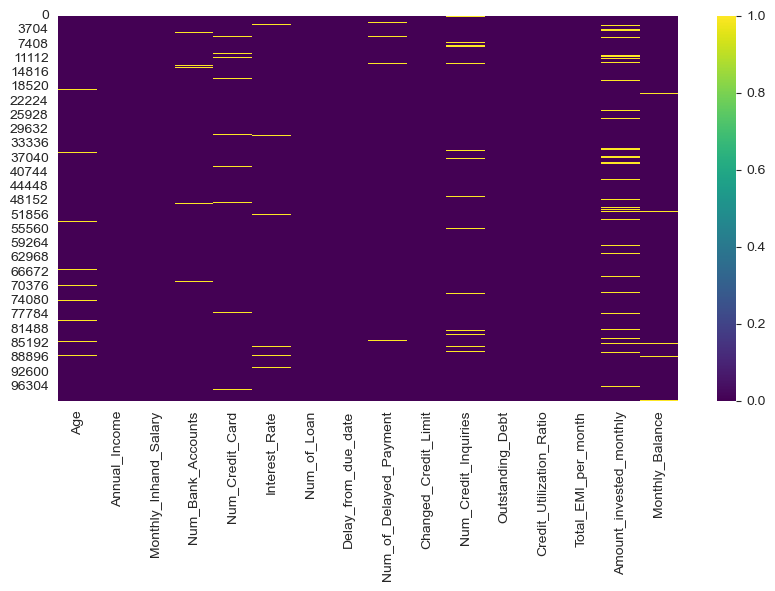

In [50]:
plt.figure(figsize = (10, 5))

sns.heatmap(train_data.select_dtypes(include = ['float64', 'int64']).isna(), cmap = 'viridis');

It is noticable the change in our data after the removal of MNAR features, remembering this is only for the numerical variables so I will have to implement another method for categorical variables.

Before I impute the missing values I will transform "Credit_History_Age" into a numerical variable.

In [51]:
train_data.dropna()['Credit_History_Age'].head()

0    22 Years and 1 Months
3    22 Years and 4 Months
4    22 Years and 5 Months
5    22 Years and 6 Months
6    22 Years and 7 Months
Name: Credit_History_Age, dtype: object

In [52]:
train_data['Credit_History_Age'] = train_data['Credit_History_Age'].apply(
    lambda value: float(f"{value.split()[0]}.{value.split()[3]}") if type(value) != type(float()) else value)

test_data['Credit_History_Age'] = test_data['Credit_History_Age'].apply(
    lambda value: float(f"{value.split()[0]}.{value.split()[3]}") if type(value) != type(float()) else value)

### Data imputation with KNN Imputer


It is important to know that this might take a couple of minutes to impute!

In [53]:
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.impute import KNNImputer



NumericalVariablesNaN = [feature for feature in train_data.select_dtypes(include = ['float64', 'int64']) 
                        if train_data[feature].isna().sum() > 0]

imputer = SklearnTransformerWrapper(transformer = KNNImputer(weights = "distance"), variables = NumericalVariablesNaN)

imputer.fit(train_data.drop('Credit_Score', axis = 1))

SklearnTransformerWrapper(transformer=KNNImputer(weights='distance'),
                          variables=['Age', 'Num_Bank_Accounts',
                                     'Num_Credit_Card', 'Interest_Rate',
                                     'Num_of_Delayed_Payment',
                                     'Num_Credit_Inquiries',
                                     'Credit_History_Age',
                                     'Amount_invested_monthly',
                                     'Monthly_Balance'])

In [54]:
target = train_data['Credit_Score']

train_data = imputer.transform(train_data.drop('Credit_Score', axis = 1))

test_data = imputer.transform(test_data)

In [55]:
# Append target to the train data
train_data['Credit_Score'] = target

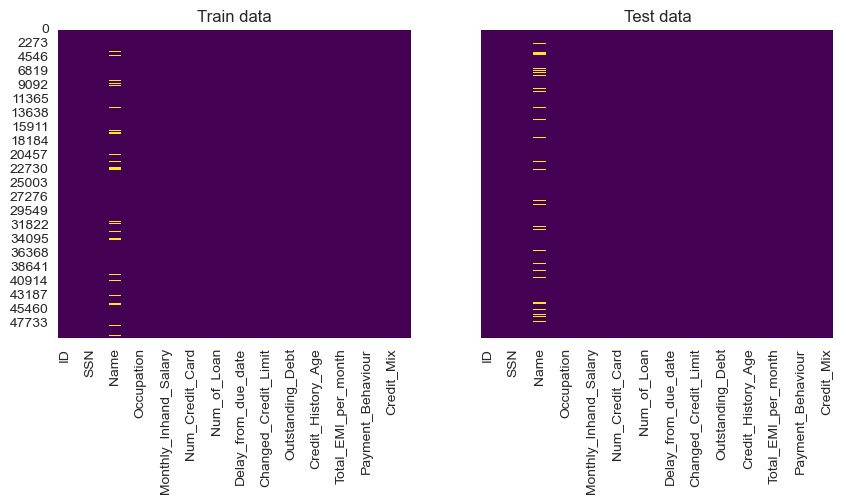

In [56]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 4), sharey = True)

sns.heatmap(train_data.isna(), cmap = 'viridis', ax = ax1, cbar = False)
ax1.set_title('Train data')

sns.heatmap(test_data.isna(), cmap = 'viridis', ax = ax2, cbar = False)
ax2.set_title('Test data');

I can see that the only column left with missing data is the name column, since name has little to none predictive value I am not gonna bother to fill this values, this column will get drop in the preprocessing phase.

## Understanding the data statistics

### Numerical Data

In [57]:
round(train_data.describe())

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,33.00,176416.00,14701.00,5.00,6.00,15.00,4.00,21.00,12.00,10.00,6.00,1426.00,32.00,18.00,1403.00,223.00,402.00
std,11.00,1429618.00,119135.00,3.00,3.00,9.00,2.00,15.00,7.00,7.00,4.00,1155.00,5.00,8.00,8306.00,229.00,213.00
min,14.00,7006.00,584.00,0.00,0.00,1.00,0.00,-5.00,-3.00,-6.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00
25%,25.00,19458.00,1621.00,3.00,4.00,8.00,2.00,10.00,8.00,5.00,3.00,566.00,28.00,12.00,30.00,76.00,270.00
50%,33.00,37579.00,3132.00,5.00,5.00,13.00,3.00,18.00,13.00,9.00,5.00,1166.00,32.00,18.00,69.00,140.00,337.00
75%,41.00,72791.00,6066.00,7.00,7.00,20.00,5.00,28.00,18.00,15.00,8.00,1946.00,36.00,25.00,161.00,277.00,470.00
max,100.00,24198062.00,2016505.00,43.00,92.00,34.00,9.00,67.00,28.00,37.00,53.00,4998.00,50.00,34.00,82331.00,1977.00,1602.00


From the numerical data I don't see any anormalies or nothing out of expected. There some insights like someone at the age of 14 having a Credit Score and someone with 92 credit cards, which is just curious.

### Categorical Data

I will drop the identifiers column's (ID, Customer_ID, SSN, Name).

In [58]:
train_data.drop('ID Customer_ID SSN Name'.split(), axis = 1).describe(include = 'O')

,Month,Occupation,Type_of_Loan,Payment_of_Min_Amount,Payment_Behaviour,Credit_Mix,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000
unique,8,16,6261,3,6,3,3
top,January,Other,None,Yes,Low_spent_Small_value_payments,Standard,Standard
freq,12500,7062,11408,52326,33113,56674,53174


In month there is only 8 months, this is probably because of the way data was splited into train and test.

In [59]:
list(train_data['Month'].unique().astype(list)), list(test_data['Month'].unique())

(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August'],
 ['September', 'October', 'November', 'December'])

As I expected it's because of the split, so this means that I can't use Month as I predictor for solving the problem, because I don't have samples to train on. Month will be dropped in the preprocessing section.

I can also see that Type_of_Loan has over 6000 observations, I need to feature engineer this column in order to reduce the number of unique values and use it as a predictor, this is because I can not introduce and encode that amount of observations.

# Analyze, identify patterns, and explore the data.

For this project our target will be predicting the Credit Score of a particular client, so it is escential for me to start analyzing and understanding our target distribution and statistics.

## Credit_Score (Target)

### Balance

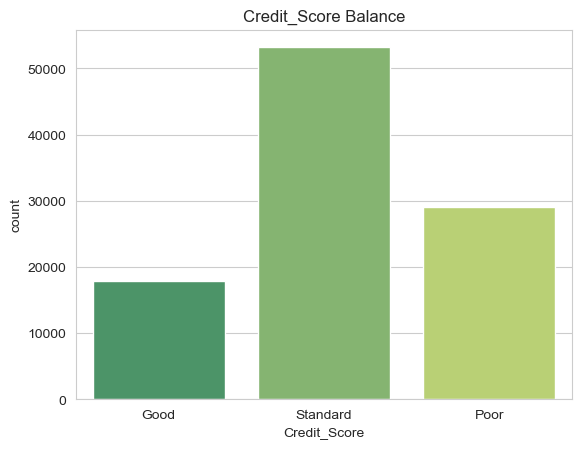

In [60]:
sns.countplot(train_data['Credit_Score'], palette = 'summer')

plt.title('Credit_Score Balance');

This project present an unbalanced multivariate classification problem, my biggest challenge would be predicting Good credit scores and Poor Credit_score.

In [61]:
pd.DataFrame(train_data['Credit_Score'].value_counts())

,Credit_Score
Standard,53174
Poor,28998
Good,17828


Fortunately the train dataset has enought samples to train a good performing model but from now on my focus would be determine what kind of profile someone with Good or Poor credit score has. 

- It may be its income?
- The investments?
- Is it the occupation?

In order to find out, I will have to start by understanding each feature predictor in an exploratory data analysis.

### Statistics

In this case I will use the median of the dataset, since I have I couple of outliers (People with high income or People with low income) I don't want them to inference in my statistics. 

In [62]:
train_data.groupby('Credit_Score').median().sort_index()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Credit_Score,,,,,,,,,,,,,,,,,
Good,36.00,45536.43,3794.70,3.00,4.00,7.00,2.00,10.00,8.00,6.59,3.00,736.47,32.74,23.58,64.81,174.47,402.06
Poor,31.00,32276.42,2689.70,7.00,7.00,21.00,5.00,27.00,16.00,9.56,8.00,1945.35,32.01,13.10,77.71,122.72,299.25
Standard,33.00,37201.06,3100.09,5.00,5.00,13.00,3.00,18.00,13.00,10.10,5.00,1001.61,32.33,18.90,65.87,142.04,344.23


It looks like older people with high income usually have a better credit score and younger people with low income have a poor credit score, standard stands in the middle of these two variables.

People with less Bank accounts have usually better credit score than those with more bank accounts, something similar happens to most the numerical variables where people with good credit score have their median statistics lower than those with standard and poor credit score. So the data does have good predictors for our problem.

I will explore further in an exploratory data analysis.

## Categorical data

### Occupation
Represents the occupation of the person

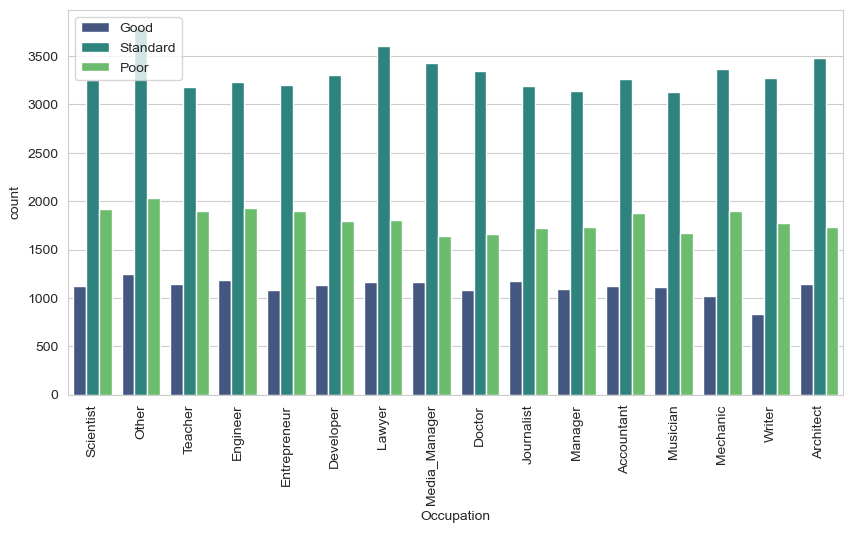

In [63]:
plt.figure(figsize = (10, 5))

sns.countplot(data = train_data, x = 'Occupation', hue = 'Credit_Score', palette = 'viridis')

plt.xticks(rotation = 90)
plt.legend(loc = 'best');

In [64]:
pd.DataFrame(train_data.groupby(['Occupation', 'Credit_Score']).count()['ID']).unstack(level = 0)

ID                                                   \
Occupation   Accountant Architect Developer Doctor Engineer Entrepreneur   
Credit_Score                                                               
Good               1128      1144      1134   1082     1182         1080   
Poor               1879      1734      1792   1661     1932         1896   
Standard           3264      3477      3309   3344     3236         3198   

                                                                              \
Occupation   Journalist Lawyer Manager Mechanic Media_Manager Musician Other   
Credit_Score                                                                   
Good               1173   1162    1098     1024          1161     1110  1243   
Poor               1725   1810    1732     1896          1645     1670  2031   
Standard           3187   3603    3143     3371          3426     3131  3788   

                                       
Occupation   Scientist Teacher Writer  
Credit_Score                           
Good              1127    1143    837  
Poor              1921    1895   1779  
Standard          3251    3177   3269

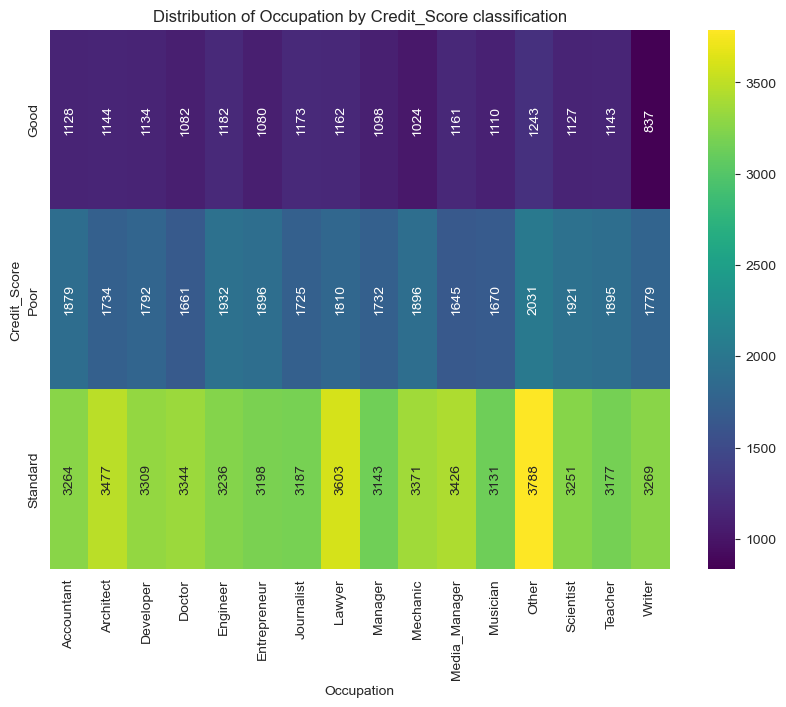

In [65]:
plt.figure(figsize = (10, 7))

sns.heatmap(pd.DataFrame(train_data.groupby(['Occupation', 'Credit_Score']).count()['ID']).unstack(level = 0), 
            annot = True, cmap = 'viridis', xticklabels = sorted(train_data['Occupation'].unique()), 
            annot_kws = {'rotation': 90}, fmt = 'g')

plt.title('Distribution of Occupation by Credit_Score classification')
plt.xlabel('Occupation');

Most of the people with Good credit score are Engineers, Journalist, Lawers and other undisclosed professions, in fact most of the professions in the dataset are outside of the ones listed (Marked as "Other").

People with Poor credit score besides those undisclosed are mechanics, scientist and Engineer's. And most of the people with standard credit are Lawyers, architect's and media managers. 

Defenitly there is some labels to identify the credit score even when the vast majority are standard.

### Type_of_Loan
Represents the types of loan taken by a person

In order to analyze Type_of_Loan I will need to feature engineer this variable. To do this first I need to know what variables are inside all those lists.

In [66]:
# Reset KNN NaN values

train_data = train_data[train_data['Type_of_Loan'].isna() == False]

test_data = test_data[test_data['Type_of_Loan'].isna() == False]

In [67]:
ListHolder = list()

for listOfItems in train_data['Type_of_Loan']:
   
    for item in listOfItems.split(','):
            
        ListHolder.append(item[5:] if "and" in item else item[1:] if item[0] == ' ' else item)

In [68]:
set(ListHolder)

{'Auto Loan',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Home Equity Loan',
 'Mortgage Loan',
 'None',
 'Not Specified',
 'Payday Loan',
 'Personal Loan',
 'Student Loan'}

I could try to create a column for each loan and fill it with none where there no loan

In [69]:
train_data['Num_of_Loan'].max(), train_data['Num_of_Loan'].mean()

(9.0, 3.53288)

With this method I will introducing 9 new columns and since the mean of the loans by client is roughly 3 this means most of the new columns will have NaN and I might not be introducing that much value with this method so I will not do that.

Other thing I can do is keep only the first Loan as "Main Loan" which is amazing because I will be reducing the number of unique observations from 6261 to 10.

Am I loosing any value with this? It is hard to say but since the goal is predicting credit score I might no need the loan type after all, I will engineer this methods and analyse to see if there is something hidden. 

In [70]:
train_data['Type_of_Loan'] = train_data['Type_of_Loan'].apply(
    lambda value: "Other" if value.split(',')[0] == "Not Specified" else value.split(',')[0])

test_data['Type_of_Loan'] = test_data['Type_of_Loan'].apply(
    lambda value: "Other" if value.split(',')[0] == "Not Specified" else value.split(',')[0])

For readability purposes I changed "Not specified" to "Other", now I can analyse the feature

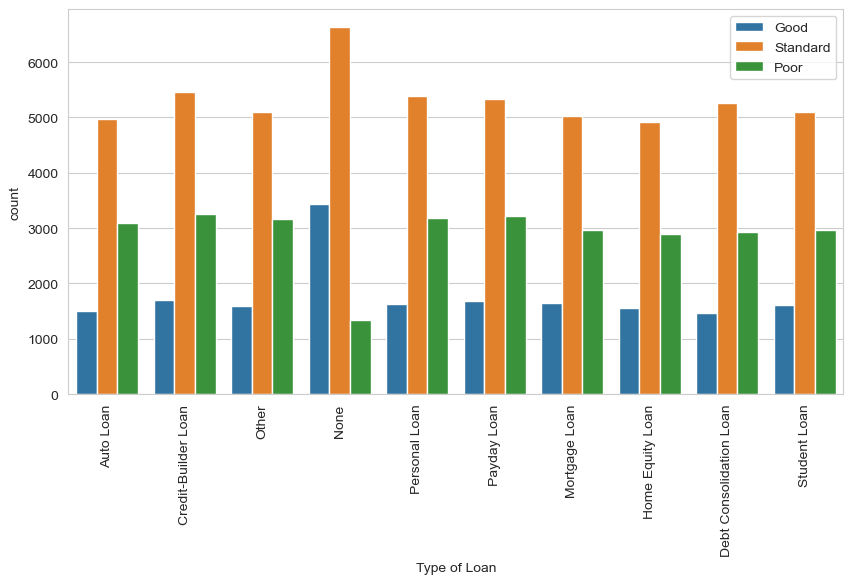

In [71]:
plt.figure(figsize = (10, 5))

sns.countplot(data = train_data, x = 'Type_of_Loan', hue = 'Credit_Score')

plt.xticks(rotation = 90)
plt.legend(loc = 'best')
plt.xlabel('Type of Loan');

In [72]:
pd.DataFrame(train_data.groupby(['Type_of_Loan', 'Credit_Score']).count()['ID']).unstack(level = 0)

ID                                              \
Type_of_Loan Auto Loan Credit-Builder Loan Debt Consolidation Loan   
Credit_Score                                                         
Good              1504                1698                    1460   
Poor              3092                3256                    2930   
Standard          4972                5462                    5258   

                                                                     \
Type_of_Loan Home Equity Loan Mortgage Loan  None Other Payday Loan   
Credit_Score                                                          
Good                     1548          1642  3444  1587        1690   
Poor                     2890          2972  1336  3165        3217   
Standard                 4922          5018  6628  5096        5341   

                                         
Type_of_Loan Personal Loan Student Loan  
Credit_Score                             
Good                  1636         1619  
Poor                  3178         2962  
Standard              5386         5091

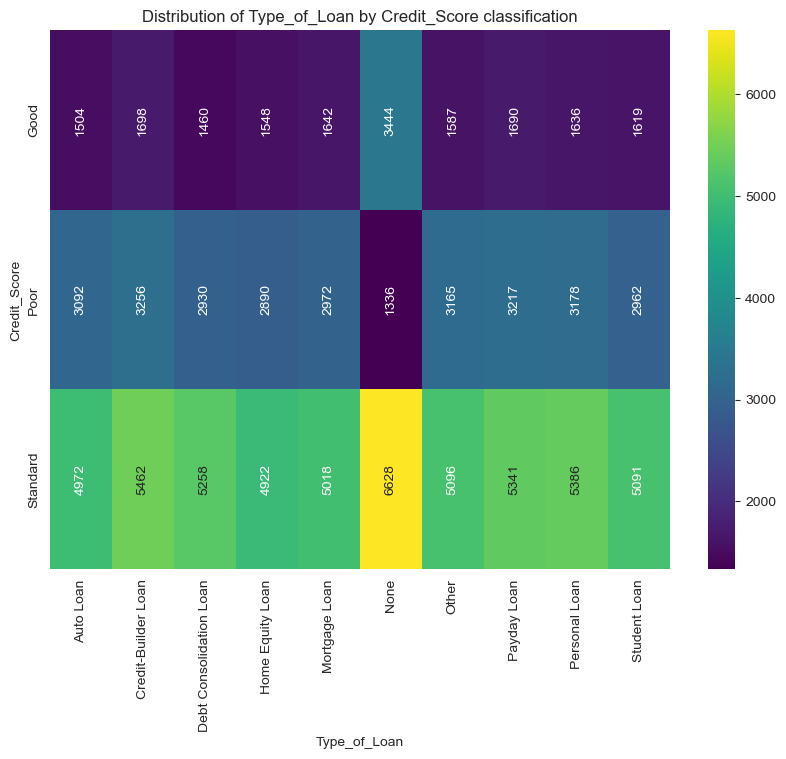

In [73]:
plt.figure(figsize = (10, 7))

sns.heatmap(pd.DataFrame(train_data.groupby(['Type_of_Loan', 'Credit_Score']).count()['ID']).unstack(level = 0), 
            annot = True, cmap = 'viridis', xticklabels = sorted(train_data['Type_of_Loan'].unique()), 
            annot_kws = {'rotation': 90}, fmt = 'g')

plt.title('Distribution of Type_of_Loan by Credit_Score classification')
plt.xlabel('Type_of_Loan');

Something noticable and expected is that most of the people with good and standard credit score have no current loan while most of the people with poor credit score have credit-builder loan, payday loan and personal loans.

Credit-Builder Loan is very common among the three credit scores. So there is some differences but not a huge gap, in case of an unexpected performance of the models I could try removing this feature.

### Payment_of_Min_Amount
Represents whether only the minimum amount was paid by the person

In [74]:
pd.DataFrame(train_data['Payment_of_Min_Amount'].value_counts())

,Payment_of_Min_Amount
Yes,52326
No,35667
NM,12007


The data has no description about what NM means, if the user paid the minimum payment its gonna be Yes and if the user paid the whole value its gonna be No, so it might been a typo, I will look at the distribution to see if there is a reason for this variable.

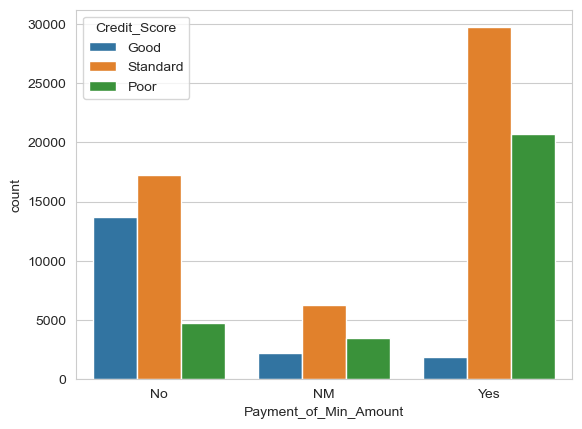

In [75]:
sns.countplot(data = train_data, x = 'Payment_of_Min_Amount', hue = 'Credit_Score');

In [76]:
round(train_data[train_data['Payment_of_Min_Amount'] == 'NM'].describe())

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,12007.00,12007.00,12007.00,12007.00,12007.00,12007.00,12007.00,12007.00,12007.00,12007.00,12007.00,12007.00,12007.00,12007.00,12007.00,12007.00,12007.00
mean,33.00,162230.00,13519.00,5.00,6.00,15.00,4.00,21.00,12.00,10.00,6.00,1431.00,32.00,18.00,1449.00,225.00,404.00
std,11.00,1370708.00,114226.00,3.00,3.00,9.00,2.00,15.00,7.00,7.00,4.00,1157.00,5.00,8.00,8558.00,231.00,217.00
min,14.00,7006.00,584.00,0.00,0.00,1.00,0.00,-5.00,-3.00,-6.00,0.00,0.00,21.00,0.00,0.00,0.00,1.00
25%,24.00,19591.00,1633.00,3.00,4.00,8.00,2.00,10.00,8.00,5.00,3.00,567.00,28.00,12.00,31.00,78.00,271.00
50%,33.00,37889.00,3157.00,6.00,5.00,13.00,3.00,18.00,13.00,9.00,5.00,1171.00,32.00,18.00,70.00,142.00,339.00
75%,41.00,72690.00,6058.00,7.00,7.00,20.00,5.00,28.00,18.00,15.00,9.00,1952.00,36.00,25.00,161.00,280.00,469.00
max,95.00,24188807.00,2015734.00,43.00,92.00,34.00,9.00,67.00,28.00,36.00,53.00,4992.00,49.00,34.00,82331.00,1941.00,1542.00


Since the NM variable follows the same distribution as Yes, I am gonna append NM to Yes. In case of bad performance of our model it would be a great idea to try deleting those observations wich are around 10% of the dataset.

In [77]:
train_data['Payment_of_Min_Amount'] = train_data['Payment_of_Min_Amount'].apply(lambda value: "Yes" if value == "NM" else value)

test_data['Payment_of_Min_Amount'] = test_data['Payment_of_Min_Amount'].apply(lambda value: "Yes" if value == "NM" else value)

Now I can go ahead and analyse the feature against our target.

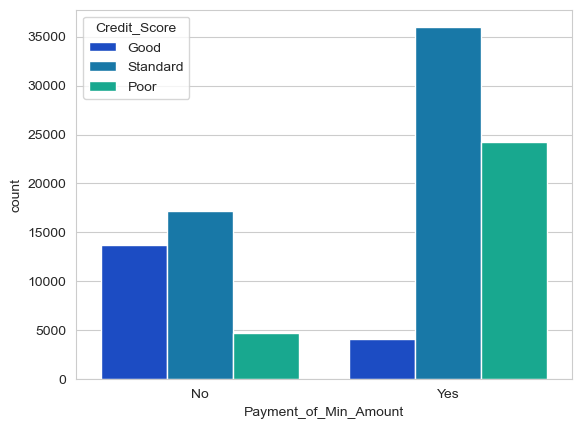

In [78]:
sns.countplot(data = train_data, x = 'Payment_of_Min_Amount', hue = 'Credit_Score', palette = 'winter');

In [79]:
pd.DataFrame(train_data.groupby(['Payment_of_Min_Amount', 'Credit_Score']).count()['ID']).unstack(level = 0)

ID       
Payment_of_Min_Amount     No    Yes
Credit_Score                       
Good                   13671   4157
Poor                    4772  24226
Standard               17224  35950

Most of the Good creditors do no pay minimal amounts and most of the Poor creditors pay more minimal amounts, so this is an amazing predictor for our target.

### Payment_Behaviour
Represents the payment behavior of the customer (in USD)

In [80]:
pd.DataFrame(train_data['Payment_Behaviour'].value_counts())

,Payment_Behaviour
Low_spent_Small_value_payments,33113
High_spent_Medium_value_payments,17540
Low_spent_Medium_value_payments,13861
High_spent_Large_value_payments,13721
High_spent_Small_value_payments,11340
Low_spent_Large_value_payments,10425


I will clean a little bit in order to make it easier to visualize.

In [81]:
train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].apply(lambda value: " ".join(value.split('_')[:2]) + ', ' + " ".join(value.split('_')[2:]))

test_data['Payment_Behaviour'] = test_data['Payment_Behaviour'].apply(lambda value: " ".join(value.split('_')[:2]) + ', ' + " ".join(value.split('_')[2:]))

after cleaning I am gonna engineered this feature into two columns: Spent_Behaviour and Payment_Behaviour, I will do that in order to reduce cardinality and saving value from those individual values.


Creating "Spent_Behaviour"

In [82]:
train_data['Spent_Behaviour'] = train_data['Payment_Behaviour'].apply(lambda value: "".join(value.split(',')[0]))

test_data['Spent_Behaviour'] = test_data['Payment_Behaviour'].apply(lambda value: "".join(value.split(',')[0]))

Modifiying "Payment_Behaviour"

In [83]:
train_data['Payment_Behaviour'] = train_data['Payment_Behaviour'].apply(lambda value: " ".join(value.split(',')[1].split()[:2]))

test_data['Payment_Behaviour'] = test_data['Payment_Behaviour'].apply(lambda value: " ".join(value.split(',')[1].split()[:2]))

Analysing features

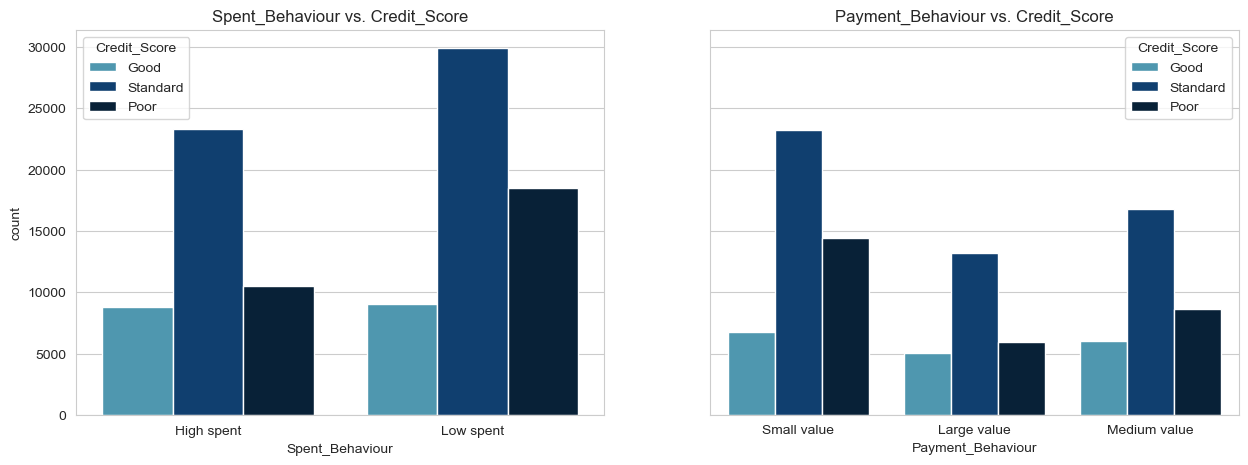

In [84]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, sharey = True, figsize = (15, 5))

palette = 'ocean_r'

sns.countplot(data = train_data, x = 'Spent_Behaviour', hue = 'Credit_Score', ax = ax1, palette = palette)
ax1.set_title('Spent_Behaviour vs. Credit_Score')

sns.countplot(data = train_data, x = 'Payment_Behaviour', hue = 'Credit_Score', ax = ax2, palette = palette)
ax2.set_title('Payment_Behaviour vs. Credit_Score')
ax2.set_ylabel('');

I can see that a lot of Poor creditors have Low spent behaviour and also are more distributed towards the Low Spent payment behaviour, so this feature are good predictors for Poor Creditors. But does the original column represents the same?

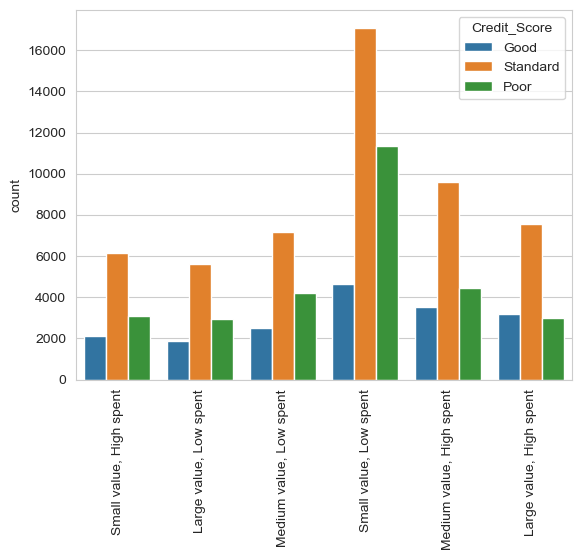

In [85]:
sns.countplot(train_data['Payment_Behaviour'] + ', ' + train_data['Spent_Behaviour'], hue = train_data['Credit_Score'])

plt.xticks(rotation = 90);

Small Value, Low Spent are more biased towards  Poor Creditors, so it does hold the same value. A really good feature for predicting Poor Credit_Score.

In [86]:
pd.DataFrame(train_data.groupby(['Payment_Behaviour', 'Credit_Score']).count()['ID']).unstack(level = 0)

ID                         
Payment_Behaviour Large value Medium value Small value
Credit_Score                                          
Good                     5052         6006        6770
Poor                     5910         8650       14438
Standard                13184        16745       23245

In [87]:
 pd.DataFrame(train_data.groupby(['Spent_Behaviour', 'Credit_Score']).count()['ID']).unstack(level = 0)

ID          
Spent_Behaviour High spent Low spent
Credit_Score                        
Good                  8810      9018
Poor                 10506     18492
Standard             23285     29889

### Credit_Mix
Represents the classification of the mix of credits

In [88]:
pd.DataFrame(train_data['Credit_Mix'].value_counts())

,Credit_Mix
Standard,56674
Good,24337
Bad,18989


This variable has the same values names as our target, I will clean it in order to make it more readable.

In [89]:
train_data['Credit_Mix'] = train_data['Credit_Mix'].map({'Standard' : 'Normal', 'Good' : 'Outstanding', 'Bad' : 'Bad'})

test_data['Credit_Mix'] = test_data['Credit_Mix'].map({'Standard' : 'Normal', 'Good' : 'Outstanding', 'Bad' : 'Bad'})

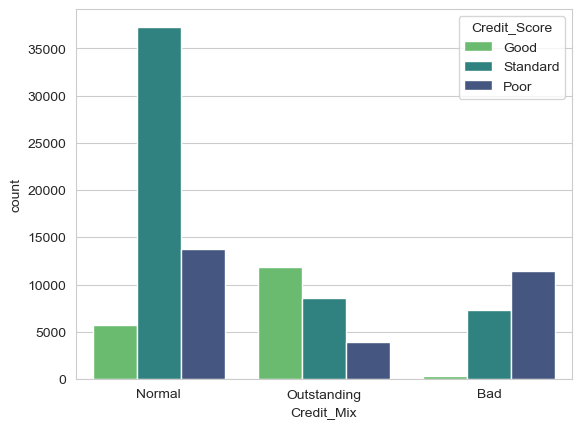

In [90]:
sns.countplot(data = train_data, x = 'Credit_Mix', hue = 'Credit_Score', palette = 'viridis_r');

There is not that many people with Good Credit_Score with a Bad Credit_Mix and most of the Good creditors have an Outstanding Credit_Mix, in the other hand most of the Poor Creditors have a Bad Credit_Mix and there not that many Poor creditors with an outstanding Credit_Mix, for the normal is just as standard.

In [91]:
pd.DataFrame(train_data.groupby(['Credit_Mix', 'Credit_Score']).count()['ID']).unstack(level = 0)

ID                   
Credit_Mix      Bad Normal Outstanding
Credit_Score                          
Good            288   5665       11875
Poor          11409  13728        3861
Standard       7292  37281        8601

Credit_Mix its a good feature for predicting Good Creditors and also helps with the prediction of Bad creditors. So there is value here.

## Numerical data

### Age
Represents the age of the person

In [92]:
train_data['Age'].unique()[:10]

array([23.        , 48.64512708, 28.        , 34.        , 54.        ,
       55.        , 21.        , 31.        , 33.        , 32.76265069])

It looks like KNN Imputator converted some values to float aproximations, which is normal for the algorithm. I am gonna convert them into integer by rounding.

In [93]:
train_data['Age'] = train_data['Age'].apply(lambda value: round(value))

test_data['Age'] = test_data['Age'].apply(lambda value: round(value))

Now I can plot to see the data.

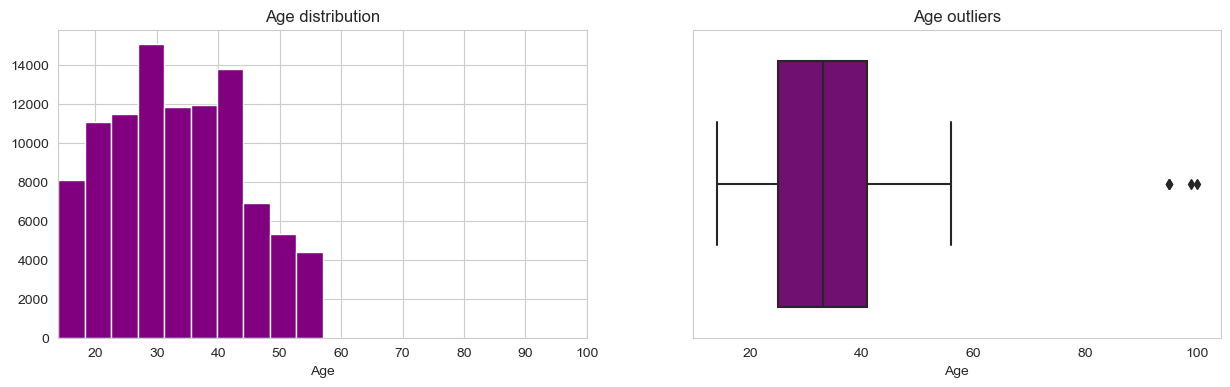

In [94]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 4))

sns.distplot(train_data['Age'], kde = False, ax = ax1, color = 'purple', bins = 20, hist_kws = {'alpha' : 1})
ax1.set_title('Age distribution')
ax1.set_xlim(train_data['Age'].min(), train_data['Age'].max())

sns.boxplot(train_data['Age'], ax = ax2, color = 'purple')
ax2.set_title('Age outliers')
ax2.grid(False);

In [95]:
pd.DataFrame(train_data['Age'].describe(include = 'all'))

,Age
count,100000.00
mean,33.31
std,10.67
min,14.00
25%,25.00
50%,33.00
75%,41.00
max,100.00


In [96]:
train_data[train_data['Age'] > 60].count()[0]

5

There only a couple of outliers which make sense, since not that many people still have loans in their 60s. That is the reason why our data mean is around 30 years. I will just go ahead and delete those outliers.

In [97]:
train_data = train_data[train_data['Age'] < train_data['Age'].quantile(.98)]

test_data = test_data[test_data['Age'] < train_data['Age'].quantile(.98)]

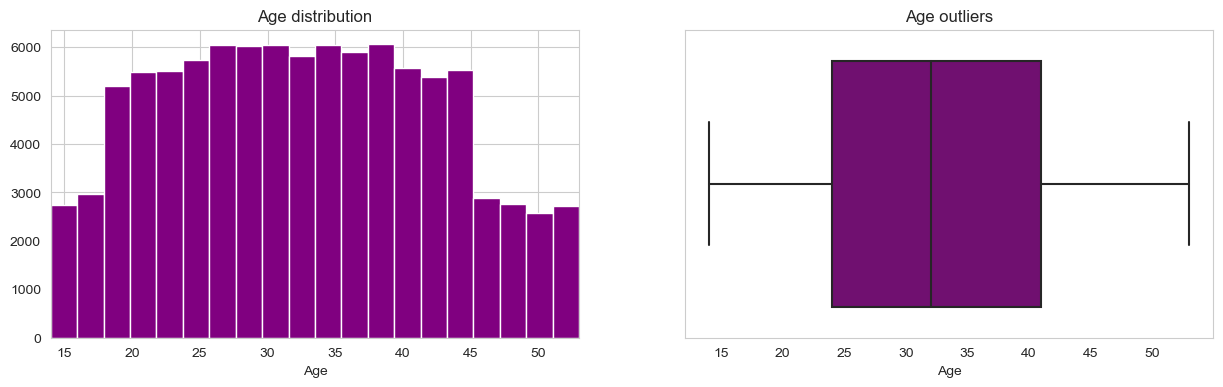

In [98]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 4))

sns.distplot(train_data['Age'], kde = False, ax = ax1, color = 'purple', bins = 20, hist_kws = {'alpha' : 1})
ax1.set_title('Age distribution')
ax1.set_xlim(train_data['Age'].min(), train_data['Age'].max())

sns.boxplot(train_data['Age'], ax = ax2, color = 'purple')
ax2.set_title('Age outliers')
ax2.grid(False);

#### Age vs. Target

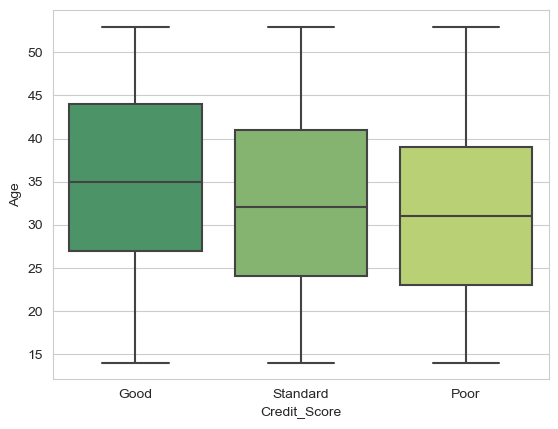

In [99]:
sns.boxplot(data = train_data, x = 'Credit_Score', y = 'Age', palette = 'summer');

The median age of creditors are very well distributed around the mean and median of the Age, but it looks like Poor creditors are in average younger than good and standard creditors, lets look at the statistics.

In [100]:
round(pd.DataFrame(train_data.groupby("Credit_Score").mean()['Age']))

,Age
Credit_Score,
Good,35.00
Poor,31.00
Standard,33.00


It looks like Good Creditors in average are older than Poor and Standard Creditors, and Standard Creditors are older than Poor Creditors, which make sense since the older you are the more money you have and better credit score. The younger you are the less money you have and then there is no way to have a good credit score. So Age its a good factor.

### Annual_Income & Monthly_Inhand_Salary
Represents the annual income of the person and the monthly base salary of a person

In [101]:
round(pd.DataFrame(train_data[['Annual_Income', 'Monthly_Inhand_Salary']].describe()))

,Annual_Income,Monthly_Inhand_Salary
count,96956.00,96956.00
mean,174794.00,14566.00
std,1421814.00,118485.00
min,7006.00,584.00
25%,19297.00,1608.00
50%,37443.00,3120.00
75%,72390.00,6032.00
max,24198062.00,2016505.00


Mean for the annual_income is 176422.0 and Median is 37579.0, so there is a lot of outliers in this feature. If the outliers are legitimate data points that accurately represent high earners in the sample, then it may not be appropriate to remove them, especially because I am interested in understanding the full range of incomes in the dataset. Removing outliers in this case could lead to inaccurate conclusions.

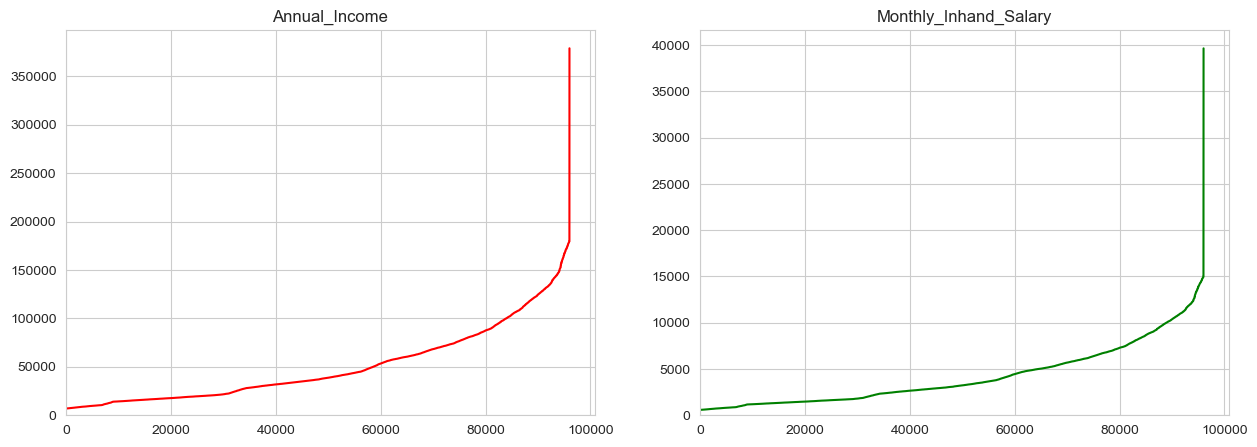

In [102]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

ax1.plot(sorted(train_data[train_data['Annual_Income'] < 400_000]['Annual_Income']), color = 'r')
ax1.set_title('Annual_Income')
ax1.set_xlim(0)
ax1.set_ylim(0)

ax2.plot(sorted(train_data[train_data['Monthly_Inhand_Salary'] < 40_000]['Monthly_Inhand_Salary']), color = 'g')
ax2.set_title('Monthly_Inhand_Salary')
ax2.set_xlim(0)
ax2.set_ylim(0);

In this case, outliers start to appear from around 175k for the annual income or around 20k for the montlhy income. Could this be data entry erros? If the outliers are due to data entry errors, measurement errors, or other anomalies, then removing them may be appropriate in order to avoid distorting your results.

Income is a good indicatior for our target, removing those outliers would mess with this distribution and unrealistic since there will be always be few people with really high income. So I am not removing them but in case of bad performance removing those outliers its an option I can explore.

#### Annual_Income & Monthly_Inhand_Salary vs. Target
Lets look at the statistics with outliers.

In [103]:
train_data.groupby('Credit_Score').median()[['Annual_Income', 'Monthly_Inhand_Salary']]

,Annual_Income,Monthly_Inhand_Salary
Credit_Score,,
Good,45007.60,3750.63
Poor,32179.72,2681.64
Standard,37083.43,3090.29


The distribution tells me that people with good credit score will earn more income and people with poor credit score, Standrd credit score holds in the middle. Now the statistics without outliers.

In [104]:
round(train_data[train_data['Annual_Income'] < 200_000].groupby('Credit_Score').median()[['Annual_Income', 'Monthly_Inhand_Salary']])

,Annual_Income,Monthly_Inhand_Salary
Credit_Score,,
Good,44872.00,3739.00
Poor,32019.00,2668.00
Standard,36807.00,3067.00


The distribution holds, this means with or without outliers people with good credit score will earn more income and people with poor credit will be the less earners of the sample. This is by looking at the median, since our data it's skew I can take into consideration the mean.

In overall I have concluded that people with high income usually have a better credit score that those with less income. So income in fact it's a good variable for our target.

### Num_Bank_Accounts
Represents the number of bank accounts a person holds

In [105]:
train_data['Num_Bank_Accounts'].unique()[:20]

array([ 3.        ,  2.        ,  1.        ,  7.        ,  4.        ,
        0.        ,  8.        ,  5.        ,  6.        ,  9.        ,
       10.        ,  6.62460583,  8.17556109,  7.98347303,  4.7681739 ,
        1.19619259,  8.59089602,  4.24339066,  6.03075015,  5.63105308])

Is always good to check the unique values after a KNN Imputation when you know your feature is not a float, since KNN will try to do it's prediction based on weights it usually returns float values. So I will convert them by rounding.

In [106]:
train_data['Num_Bank_Accounts'] = train_data['Num_Bank_Accounts'].apply(lambda value: round(value))

test_data['Num_Bank_Accounts'] = test_data['Num_Bank_Accounts'].apply(lambda value: round(value))

With the colum converted I can start looking at the distribution.

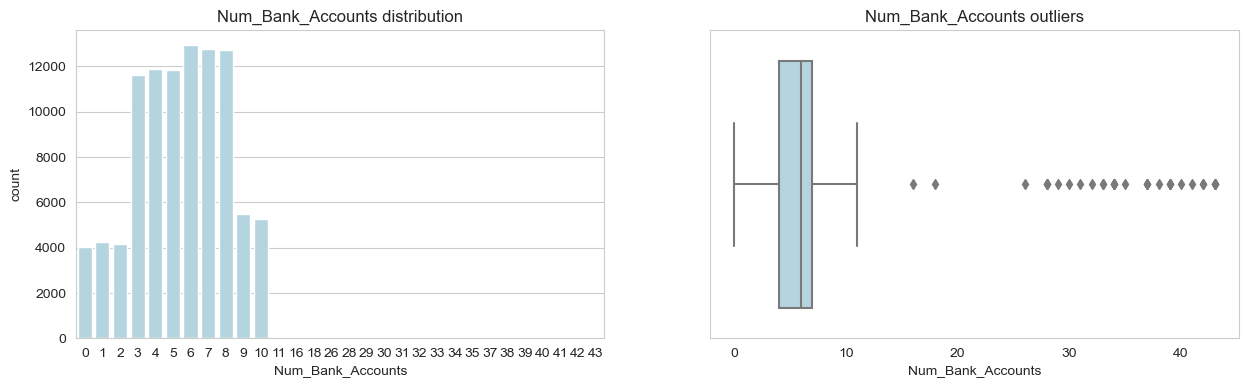

In [107]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 4))

sns.countplot(train_data['Num_Bank_Accounts'], ax = ax1, color = 'lightblue')
ax1.set_title('Num_Bank_Accounts distribution')

sns.boxplot(train_data['Num_Bank_Accounts'], ax = ax2, color = 'lightblue')
ax2.set_title('Num_Bank_Accounts outliers')
ax2.grid(False);

In [108]:
train_data[train_data['Num_Bank_Accounts'] > 11].count()[0]

32

The distribution presents about 32 outliers, since there are too few outliers it will be no value for the model. I am gonna delete them.

In [109]:
train_data = train_data[train_data['Num_Bank_Accounts'] < train_data['Num_Bank_Accounts'].quantile(.98)]

test_data = test_data[test_data['Num_Bank_Accounts'] < train_data['Num_Bank_Accounts'].quantile(.98)]

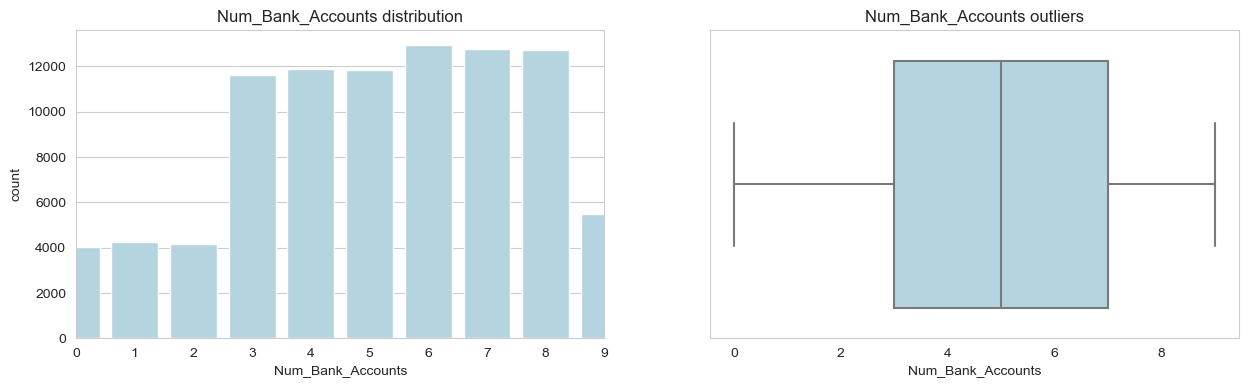

In [110]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 4))

sns.countplot(train_data['Num_Bank_Accounts'], ax = ax1, color = 'lightblue')
ax1.set_title('Num_Bank_Accounts distribution')
ax1.set_xlim(train_data['Num_Bank_Accounts'].min(), train_data['Num_Bank_Accounts'].max())

sns.boxplot(train_data['Num_Bank_Accounts'], ax = ax2, color = 'lightblue')
ax2.set_title('Num_Bank_Accounts outliers')
ax2.grid(False);

#### Annual_Income & Monthly_Inhand_Salary vs. Target

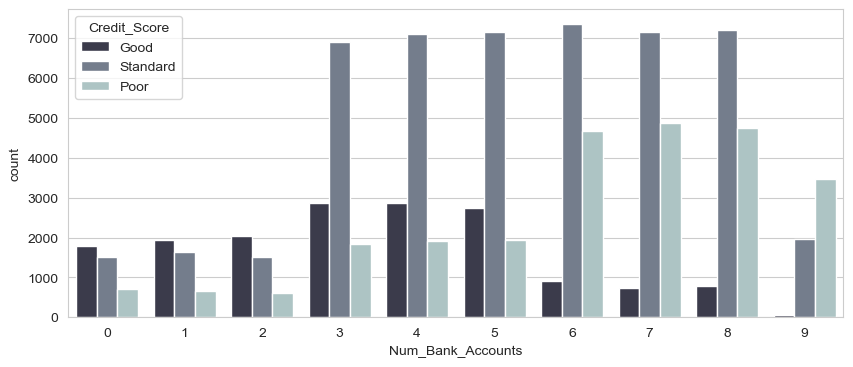

In [111]:
plt.figure(figsize = (10, 4))

sns.countplot(train_data['Num_Bank_Accounts'], hue = train_data['Credit_Score'], palette  = 'bone');

In [112]:
round(pd.DataFrame(train_data.groupby("Credit_Score").mean()['Num_Bank_Accounts']))

,Num_Bank_Accounts
Credit_Score,
Good,3.00
Poor,6.00
Standard,5.00


A behaviour similar to all the other variables and as discussed at the beginning of the project. Good creditors in average have less bank accounts than poor creditors. Standard standing in the middle, Num_Bank_Accounts is a valuable feature for our model.

### Num_Credit_Card
Represents the number of other credit cards held by a person

In [113]:
train_data['Num_Credit_Card'].unique()[:20]

array([ 4.        ,  4.21276538,  5.        ,  5.35164493,  1.        ,
        7.        ,  6.        ,  5.21913971,  5.32692597,  8.        ,
        4.24891005,  6.96675126,  3.        ,  4.10357524,  5.10981197,
        9.        ,  6.60295522,  5.00469464,  2.        , 10.        ])

I need to convert the values to int by rounding (KNN Imputations)

In [114]:
train_data['Num_Credit_Card'] = train_data['Num_Credit_Card'].apply(lambda value: round(value))

test_data['Num_Credit_Card'] = test_data['Num_Credit_Card'].apply(lambda value: round(value))

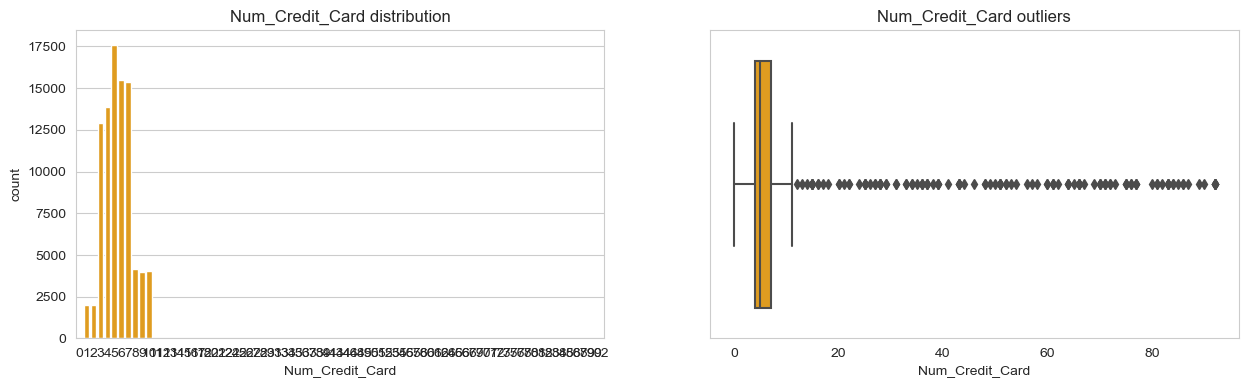

In [115]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 4))

sns.countplot(train_data['Num_Credit_Card'], ax = ax1, color = 'orange')
ax1.set_title('Num_Credit_Card distribution')

sns.boxplot(train_data['Num_Credit_Card'], ax = ax2, color = 'orange')
ax2.set_title('Num_Credit_Card outliers')
ax2.grid(False);

In [116]:
pd.DataFrame(train_data['Num_Credit_Card'].describe())

,Num_Credit_Card
count,91667.00
mean,5.52
std,2.81
min,0.00
25%,4.00
50%,5.00
75%,7.00
max,92.00


In [117]:
train_data[train_data['Num_Credit_Card'] > 15].count()[0]

117

The data presents few outliers too, since they are not that many there is no reason to keep them in the dataframe, I am gonna delete them.

In [118]:
train_data = train_data[train_data['Num_Credit_Card'] < train_data['Num_Credit_Card'].quantile(.98)]

test_data = test_data[test_data['Num_Credit_Card'] < train_data['Num_Credit_Card'].quantile(.98)]

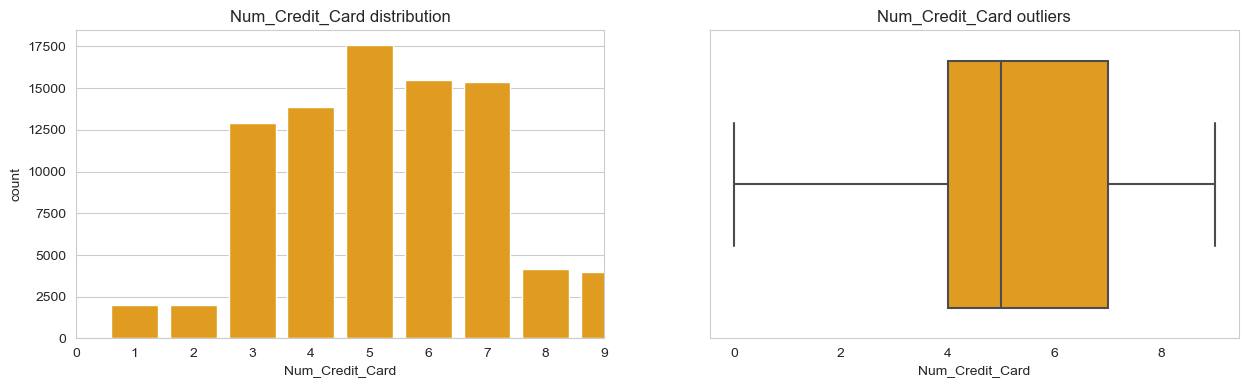

In [119]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 4))

sns.countplot(train_data['Num_Credit_Card'], ax = ax1, color = 'orange')
ax1.set_title('Num_Credit_Card distribution')
ax1.set_xlim(train_data['Num_Credit_Card'].min(), train_data['Num_Credit_Card'].max())

sns.boxplot(train_data['Num_Credit_Card'], ax = ax2, color = 'orange')
ax2.set_title('Num_Credit_Card outliers')
ax2.grid(False);

#### Num_Credit_Card vs. Target

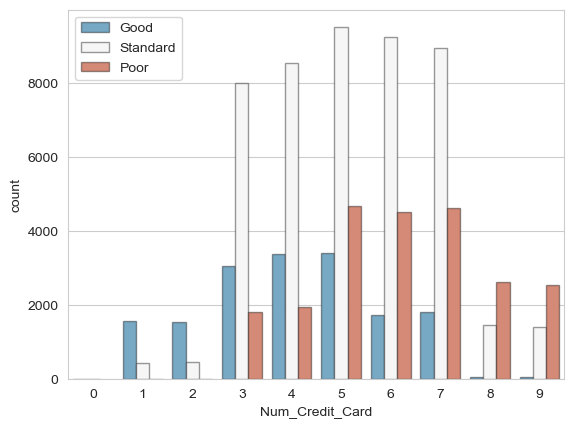

In [120]:
sns.countplot(data = train_data, x = 'Num_Credit_Card', hue = 'Credit_Score', palette = 'RdBu_r', edgecolor = (0, 0, 0, 0.4))

plt.legend(loc = 'upper left');

Here is something amazing, Poor creditors have 3 or more credit cards while most of the good creditors have 1, 2, or 3 credit cards. 

In [121]:
round(pd.DataFrame(train_data.groupby("Credit_Score").agg(['mean', 'count'])['Num_Credit_Card']))

,mean,count
Credit_Score,,
Good,4.00,16688
Poor,6.00,22778
Standard,5.00,47989


The mean really show this off, good creditors usually have less credit cards and in average Poor creditors have more than the others. Just as bank accounts, the number of credit cards it a good predictor.

### Interest_Rate
Represents the interest rate on credit card

In [122]:
train_data['Interest_Rate'].unique()[:20]

array([ 3.        ,  6.        ,  8.        ,  5.        , 10.08637673,
       15.        ,  7.        , 12.        , 20.        ,  1.        ,
        7.22839437, 14.        , 32.        , 16.        , 17.        ,
        9.1232403 ,  9.64910761, 10.        , 31.        , 25.        ])

In [123]:
train_data['Interest_Rate'] = train_data['Interest_Rate'].apply(lambda value: round(value))

test_data['Interest_Rate'] = test_data['Interest_Rate'].apply(lambda value: round(value))

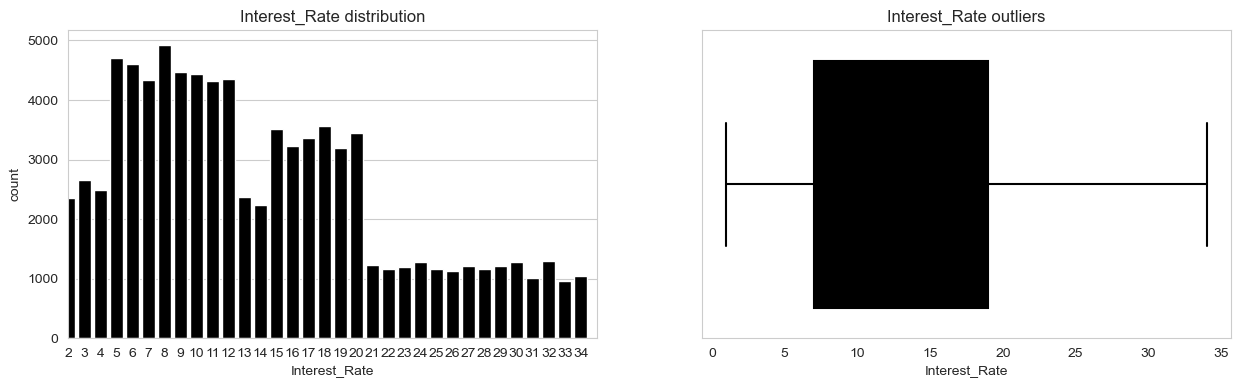

In [124]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 4))

sns.countplot(train_data['Interest_Rate'], ax = ax1, color = 'black')
ax1.set_title('Interest_Rate distribution')
ax1.set_xlim(train_data['Interest_Rate'].min(), train_data['Interest_Rate'].max())

sns.boxplot(train_data['Interest_Rate'], ax = ax2, color = 'black')
ax2.set_title('Interest_Rate outliers')
ax2.grid(False);

#### Interest_Rate vs. Target

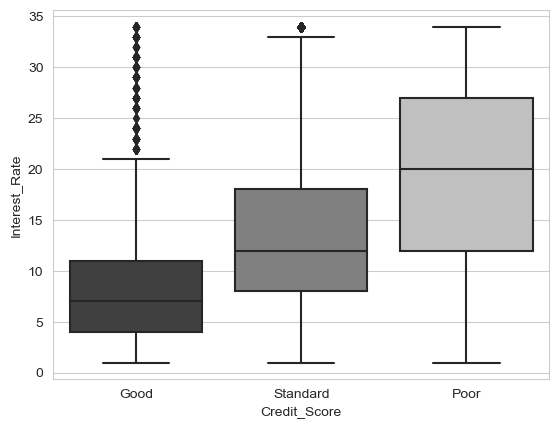

In [125]:
sns.boxplot(data = train_data, x = 'Credit_Score', y = 'Interest_Rate', palette = 'gray');

As expected, poor creditors usually have the worst interest rate than the others and good creditors have the best interest rate.

### Num_of_Loan
Represents the number of loans taken from the bank

In [126]:
train_data['Num_of_Loan'].unique()

array([4., 1., 3., 0., 2., 7., 5., 6., 8., 9.])

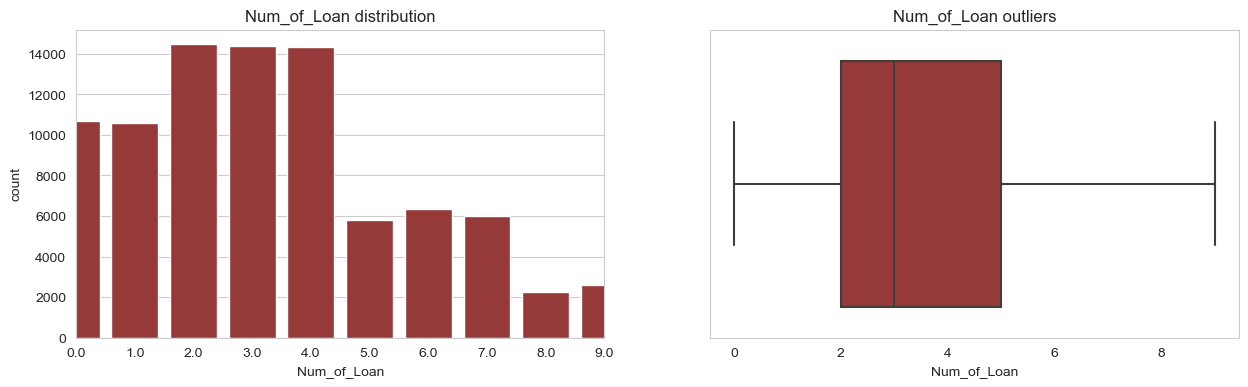

In [127]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 4))

sns.countplot(train_data['Num_of_Loan'], ax = ax1, color = 'brown')
ax1.set_title('Num_of_Loan distribution')
ax1.set_xlim(train_data['Num_of_Loan'].min(), train_data['Num_of_Loan'].max())

sns.boxplot(train_data['Num_of_Loan'], ax = ax2, color = 'brown')
ax2.set_title('Num_of_Loan outliers')
ax2.grid(False);

In [128]:
pd.DataFrame(train_data['Num_of_Loan'].describe())

,Num_of_Loan
count,87455.00
mean,3.32
std,2.35
min,0.00
25%,2.00
50%,3.00
75%,5.00
max,9.00


#### Num_of_Loan vs. Target

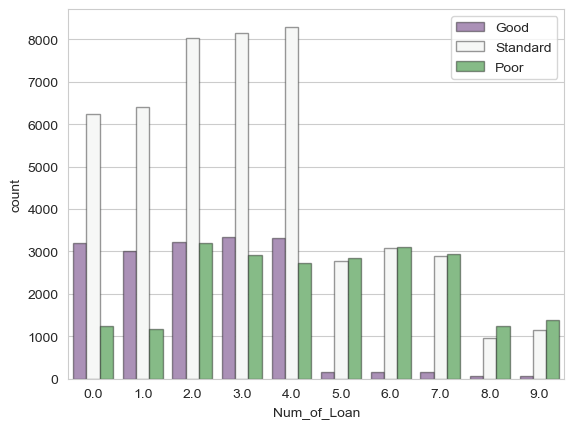

In [129]:
sns.countplot(data = train_data, x = 'Num_of_Loan', hue = 'Credit_Score', palette = 'PRGn', edgecolor = (0, 0, 0, 0.4))

plt.legend(loc = 'upper right')

People with good credit score usually don't have more than 4 loans, while people with poor credit score have usually have more loans. 

### Delay_from_due_date
Represents the average number of days delayed from the payment date

In [130]:
train_data['Delay_from_due_date'].unique()

array([ 3, -1,  5,  6,  8,  7, 13, 10,  9,  1, 12, 11,  0, 30, 31, 34, 27,
       14,  4,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 29, 50, 58, 45, 57, 59, 54, 62, 65,
       64, 67, 36, 41, 55, 61, 39, 44, 42, 60, 33, 38, -3, 56, 63, 40, 32,
       35, 37, -5, -4, 66], dtype=int64)

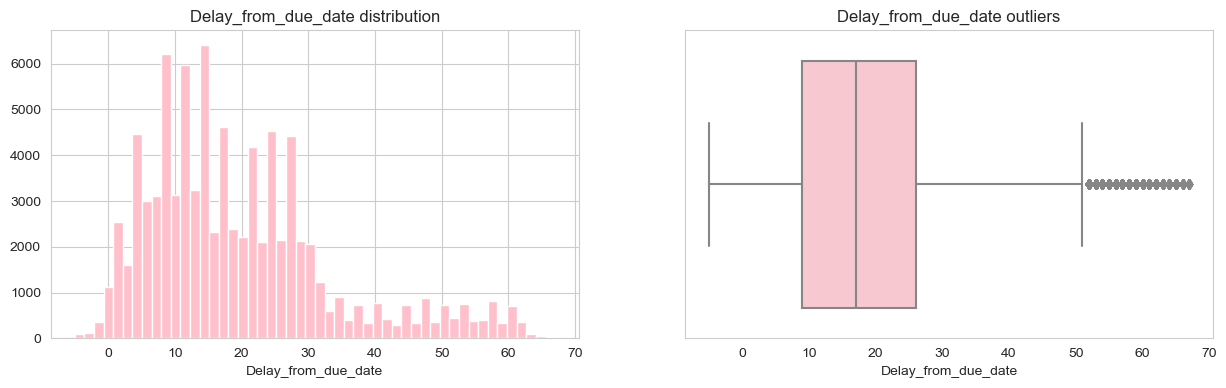

In [131]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 4))

sns.distplot(train_data['Delay_from_due_date'], ax = ax1, color = 'pink', kde = False, hist_kws = {'alpha' : 1})
ax1.set_title('Delay_from_due_date distribution')

sns.boxplot(train_data['Delay_from_due_date'], ax = ax2, color = 'pink')
ax2.set_title('Delay_from_due_date outliers')
ax2.grid(False);

In [132]:
pd.DataFrame(train_data[train_data['Delay_from_due_date'] > 50].groupby('Credit_Score').count()['ID'])

,ID
Credit_Score,
Good,60
Poor,3038
Standard,1593


There are some outliers, but those outliers are people that delayed for more than 2 months in a payment and as seem in the statistics it's a good measure for finding out Poor creditors since more than half of outliers are poor creditors. So I am gonna keep this outliers.

In [133]:
pd.DataFrame(train_data['Delay_from_due_date'].describe())

,Delay_from_due_date
count,87455.00
mean,19.55
std,13.91
min,-5.00
25%,9.00
50%,17.00
75%,26.00
max,67.00


#### Delay_from_due_date vs. Target

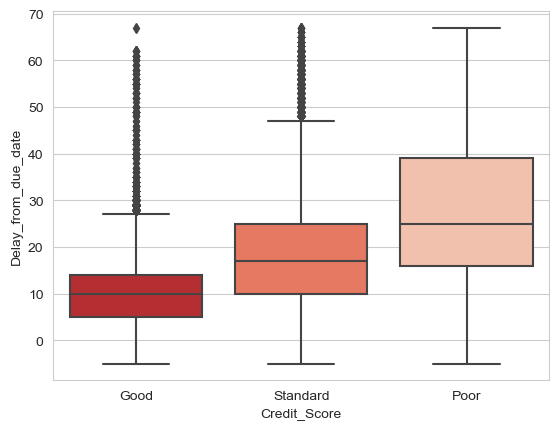

In [134]:
sns.boxplot(data = train_data, x = 'Credit_Score', y = 'Delay_from_due_date', palette = 'Reds_r');

Good creditors usually have less delays while poor creditors usually have more delayed days.

### Num_of_Delayed_Payment
Represents the average number of payments delayed by a person

In [135]:
# Rounding values from KNN 

train_data['Num_of_Delayed_Payment'] = train_data['Num_of_Delayed_Payment'].apply(lambda value: round(value))

test_data['Num_of_Delayed_Payment'] = test_data['Num_of_Delayed_Payment'].apply(lambda value: round(value))

In [136]:
train_data['Num_of_Delayed_Payment'].unique()

array([ 7,  0,  4,  8,  6,  1, -1,  3,  5, 12, 15, 17, 10,  2, 11, 14, 20,
       22,  9, 13, 16, 18, 19, 23, 24, 21, 25, 26, -3, 27, -2, 28],
      dtype=int64)

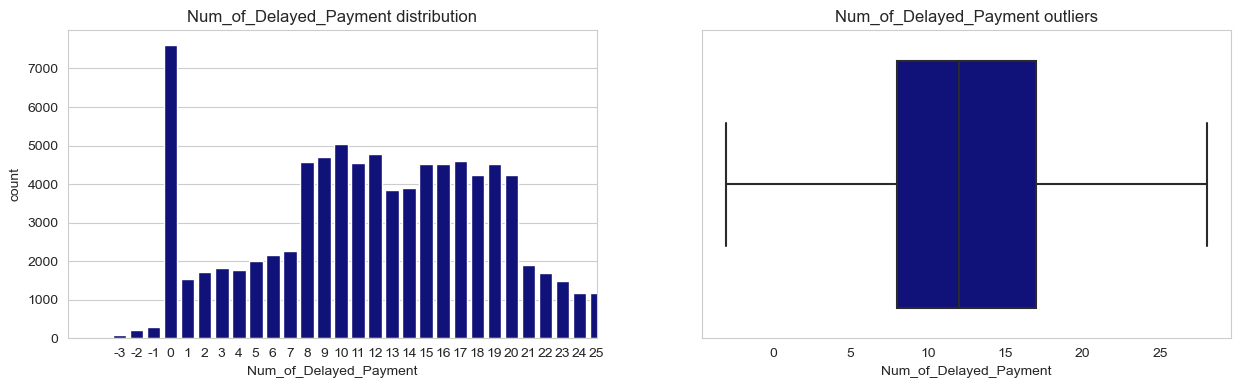

In [137]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 4))

sns.countplot(train_data['Num_of_Delayed_Payment'], ax = ax1, color = 'darkblue')
ax1.set_title('Num_of_Delayed_Payment distribution')
ax1.set_xlim(train_data['Num_of_Delayed_Payment'].min(), train_data['Num_of_Delayed_Payment'].max())

sns.boxplot(train_data['Num_of_Delayed_Payment'], ax = ax2, color = 'darkblue')
ax2.set_title('Num_of_Delayed_Payment outliers')
ax2.grid(False);

In [138]:
pd.DataFrame(train_data['Num_of_Delayed_Payment'].describe())

,Num_of_Delayed_Payment
count,87455.00
mean,11.94
std,6.82
min,-3.00
25%,8.00
50%,12.00
75%,17.00
max,28.00


#### Num_of_Delayed_Payment vs. Target

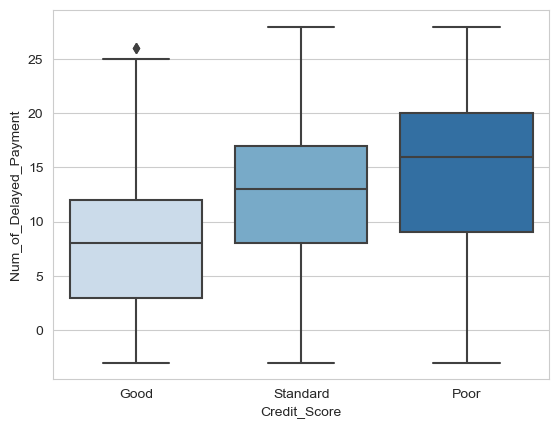

In [139]:
sns.boxplot(data = train_data, x = 'Credit_Score', y = 'Num_of_Delayed_Payment', palette = 'Blues');

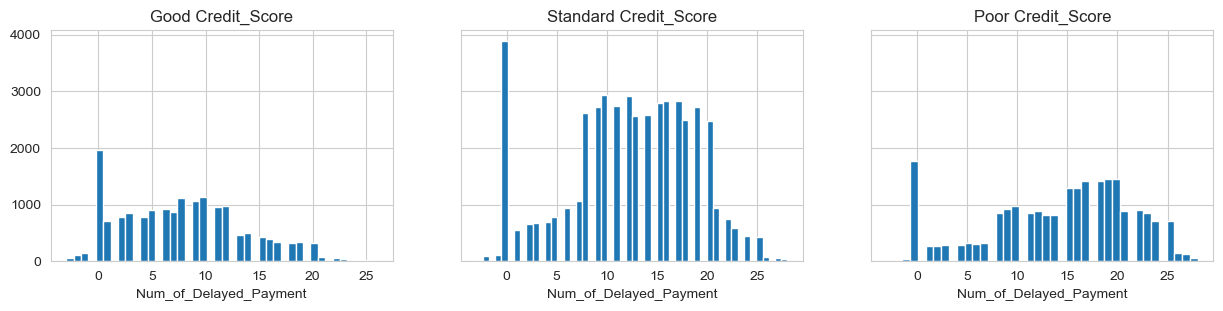

In [140]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (15, 3), sharey = True)

sns.distplot(train_data[train_data['Credit_Score'] == 'Good']['Num_of_Delayed_Payment'], kde = False, ax = ax1, hist_kws = {'alpha' : 1})
ax1.set_title('Good Credit_Score')

sns.distplot(train_data[train_data['Credit_Score'] == 'Standard']['Num_of_Delayed_Payment'], kde = False, ax = ax2, hist_kws = {'alpha' : 1})
ax2.set_title('Standard Credit_Score')

sns.distplot(train_data[train_data['Credit_Score'] == 'Poor']['Num_of_Delayed_Payment'], kde = False, ax = ax3, hist_kws = {'alpha' : 1})
ax3.set_title('Poor Credit_Score');

It is really hard to see a difference but I notice that average poor creditors have more delayed payment this is going hand by hand with the delayed days from payment so there still value.

### Changed_Credit_Limit
Represents the percentage change in credit card limit

In [141]:
train_data['Changed_Credit_Limit'].nunique()

4197

I will need to round the values in order to reduce cardinality, since this is a % change I can round to the integer.

In [142]:
train_data['Changed_Credit_Limit'] = train_data['Changed_Credit_Limit'].apply(lambda value: round(value))

test_data['Changed_Credit_Limit'] = test_data['Changed_Credit_Limit'].apply(lambda value: round(value))

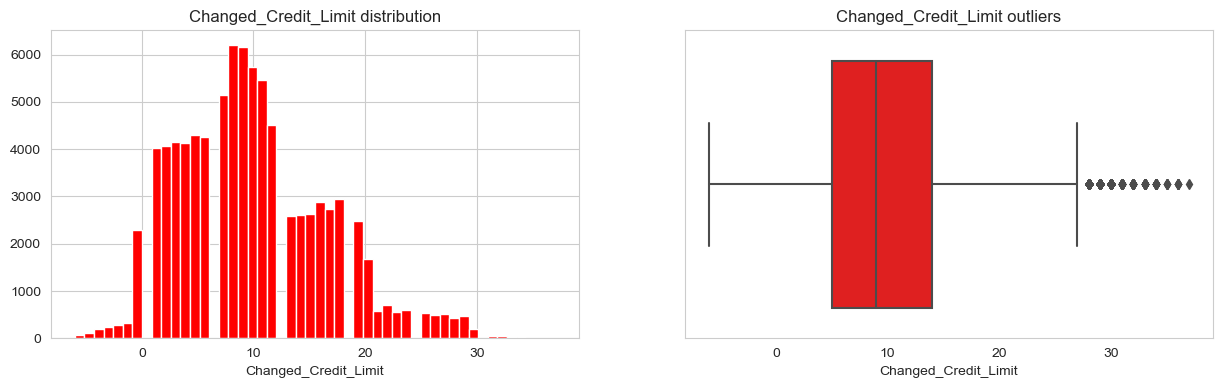

In [143]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 4))

sns.distplot(train_data['Changed_Credit_Limit'], ax = ax1, color = 'red', kde = False, hist_kws = {'alpha' : 1})
ax1.set_title('Changed_Credit_Limit distribution')

sns.boxplot(train_data['Changed_Credit_Limit'], ax = ax2, color = 'red')
ax2.set_title('Changed_Credit_Limit outliers')
ax2.grid(False);

In [144]:
pd.DataFrame(train_data[train_data['Changed_Credit_Limit'] > train_data['Changed_Credit_Limit'].quantile(0.98)].groupby('Credit_Score').count()['ID'])

,ID
Credit_Score,
Good,55
Poor,453
Standard,744


Outliers (People that have changed the credit limit more than 29%) are mostly standard followed by Poor, I am not gonna remove them.

In [145]:
pd.DataFrame(train_data['Changed_Credit_Limit'].describe())

,Changed_Credit_Limit
count,87455.00
mean,9.89
std,6.60
min,-6.00
25%,5.00
50%,9.00
75%,14.00
max,37.00


#### Changed_Credit_Limit vs. Target

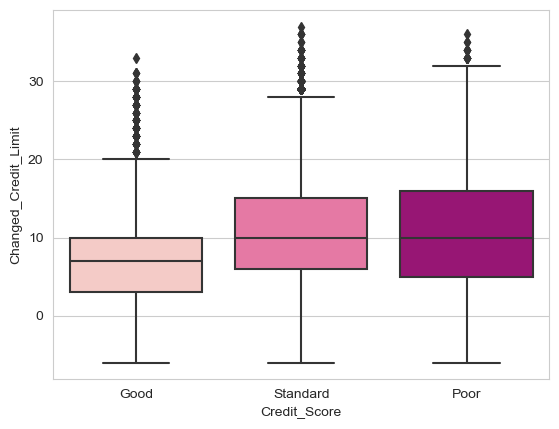

In [146]:
sns.boxplot(data = train_data, x = 'Credit_Score', y = 'Changed_Credit_Limit', palette = 'RdPu');

It is really hard to determine if there is a difference in this feature, it might be a good idea to remove it. I am gonna keep it for now but in case of unexpected performance in the model, removing this variable might be a good solution.

### Num_Credit_Inquiries
Represents the number of credit card inquiries

In [147]:
train_data['Num_Credit_Inquiries'].nunique()

3114

In [148]:
# Rounding values from KNN 

train_data['Num_Credit_Inquiries'] = train_data['Num_Credit_Inquiries'].apply(lambda value: round(value))

test_data['Num_Credit_Inquiries'] = test_data['Num_Credit_Inquiries'].apply(lambda value: round(value))

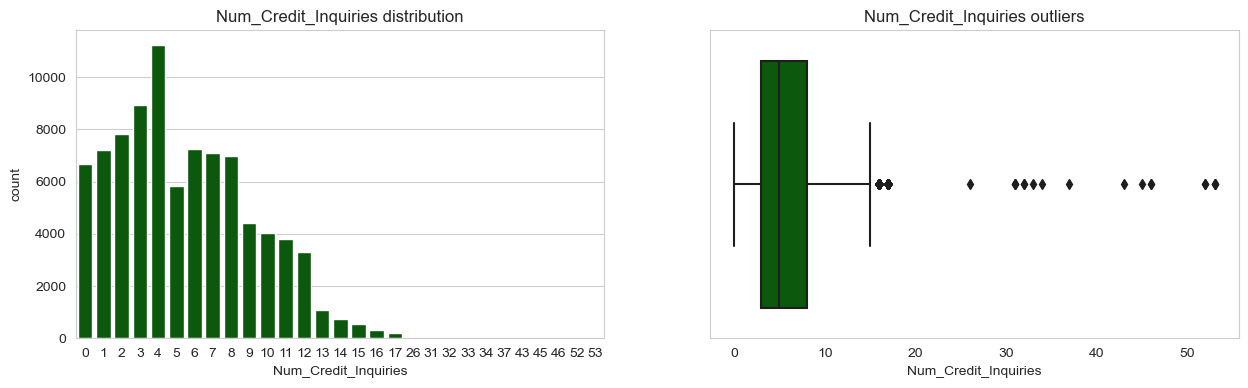

In [149]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 4))

sns.countplot(train_data['Num_Credit_Inquiries'], ax = ax1, color = 'darkgreen')
ax1.set_title('Num_Credit_Inquiries distribution')

sns.boxplot(train_data['Num_Credit_Inquiries'], ax = ax2, color = 'darkgreen')
ax2.set_title('Num_Credit_Inquiries outliers')
ax2.grid(False);

In [150]:
pd.DataFrame(train_data['Num_Credit_Inquiries'].value_counts()).sort_index()

,Num_Credit_Inquiries
0,6658
1,7201
2,7820
3,8944
4,11234
5,5818
6,7259
7,7104
8,6992
9,4398


In [151]:
train_data[train_data['Num_Credit_Inquiries'] > 17].count()[0]

18

In [152]:
# Deleting outliers

train_data = train_data[train_data['Num_Credit_Inquiries'] < 17]

test_data = test_data[test_data['Num_Credit_Inquiries'] < 17]

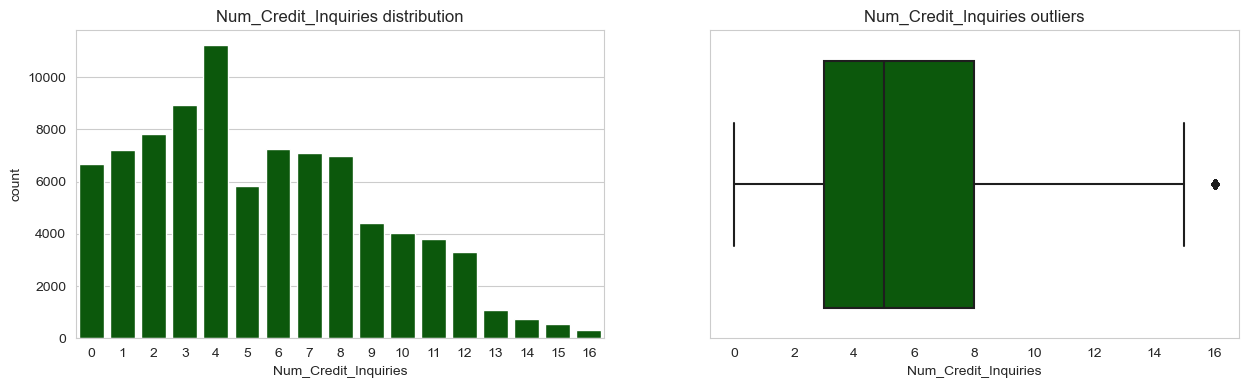

In [153]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 4))

sns.countplot(train_data['Num_Credit_Inquiries'], ax = ax1, color = 'darkgreen')
ax1.set_title('Num_Credit_Inquiries distribution')

sns.boxplot(train_data['Num_Credit_Inquiries'], ax = ax2, color = 'darkgreen')
ax2.set_title('Num_Credit_Inquiries outliers')
ax2.grid(False);

In [154]:
pd.DataFrame(train_data['Num_Credit_Inquiries'].describe())

,Num_Credit_Inquiries
count,87233.00
mean,5.41
std,3.67
min,0.00
25%,3.00
50%,5.00
75%,8.00
max,16.00


#### Num_Credit_Inquiries vs. Target

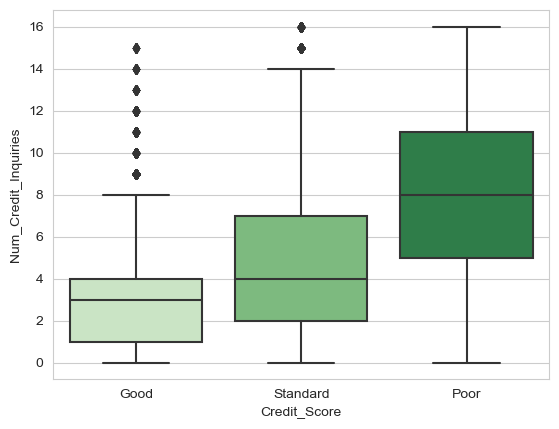

In [155]:
sns.boxplot(data = train_data, x = 'Credit_Score', y = 'Num_Credit_Inquiries', palette = 'Greens');

Poor creditors usually have more inquiries than good creditors, so this is valuable to determin both of them.

### Outstanding_Debt
Represents the remaining debt to be paid (in USD)

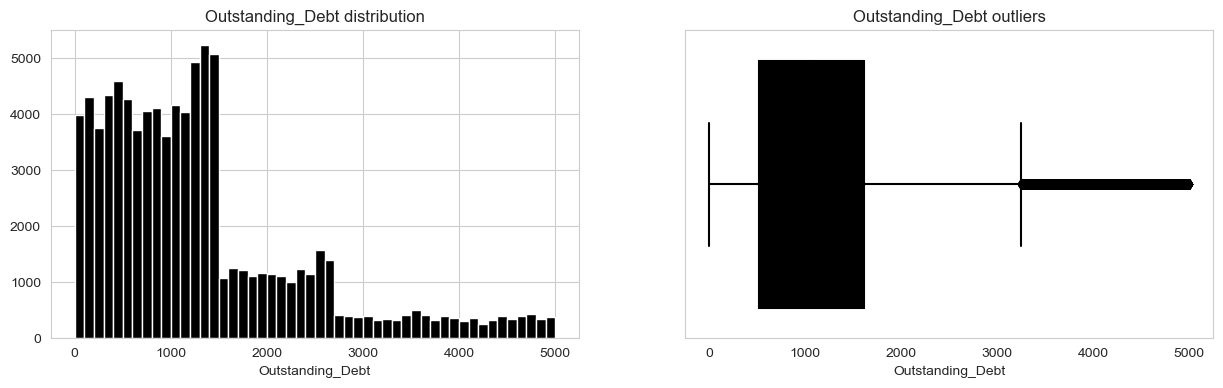

In [156]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 4))

sns.distplot(train_data['Outstanding_Debt'], ax = ax1, color = 'black', kde = False, hist_kws = {'alpha' : 1})
ax1.set_title('Outstanding_Debt distribution')

sns.boxplot(train_data['Outstanding_Debt'], ax = ax2, color = 'black')
ax2.set_title('Outstanding_Debt outliers')
ax2.grid(False);

#### Outstanding_Debt vs. Target

In [157]:
pd.DataFrame(train_data.groupby('Credit_Score').median()['Outstanding_Debt'])

,Outstanding_Debt
Credit_Score,
Good,730.73
Poor,1820.55
Standard,939.63


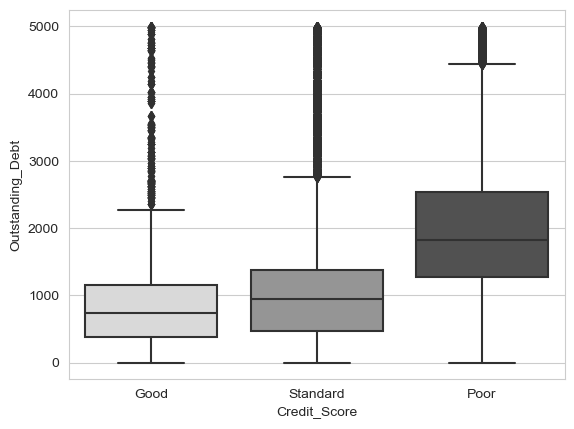

In [158]:
sns.boxplot(data = train_data, x = 'Credit_Score', y = 'Outstanding_Debt', palette = 'Greys');

Poor creditors in average have larger debt to be paid than good creditors. So it is really good feature for determine each one.

### Credit_Utilization_Ratio
Represents the percentage change in credit card limit

In [159]:
train_data['Credit_Utilization_Ratio'].nunique()

87233

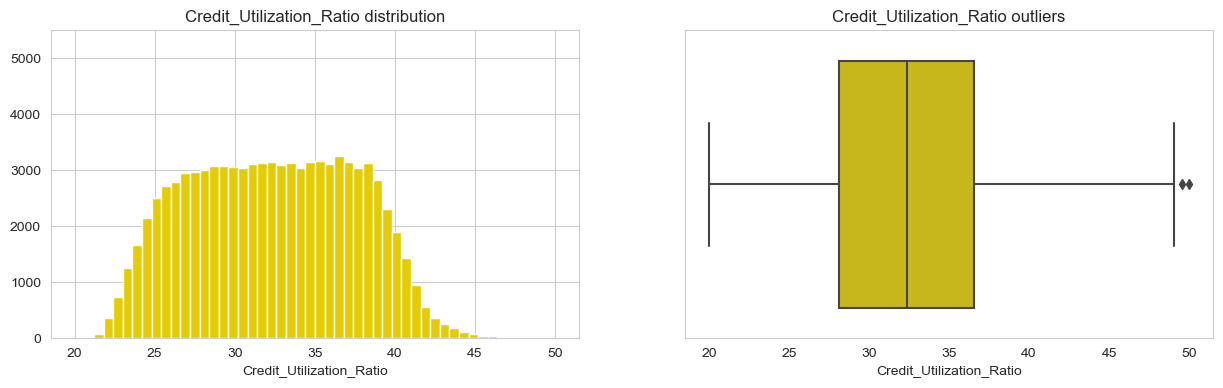

In [160]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 4))

sns.distplot(train_data['Credit_Utilization_Ratio'], ax = ax1, color = '#E5CC00', kde = False, hist_kws = {'alpha' : 1})
ax1.set_title('Credit_Utilization_Ratio distribution')
ax1.set_ylim(bottom = 0, top = 5500)

sns.boxplot(train_data['Credit_Utilization_Ratio'], ax = ax2, color = '#E5CC00')
ax2.set_title('Credit_Utilization_Ratio outliers')
ax2.grid(False);

Distribution is normal and as expected in large samples datasets.

#### Credit_Utilization_Ratio vs. Target

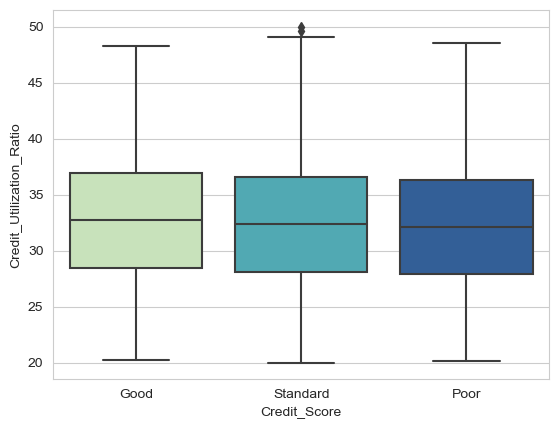

In [161]:
sns.boxplot(data = train_data, x = 'Credit_Score', y = 'Credit_Utilization_Ratio', palette = 'YlGnBu');

In [162]:
pd.DataFrame(train_data.groupby('Credit_Score').median()['Credit_Utilization_Ratio'])

,Credit_Utilization_Ratio
Credit_Score,
Good,32.76
Poor,32.09
Standard,32.36


The statistic it's pretty similar for all the credit_score. In order to capture some insights Ill look at the data without the "Standard" credit_score.

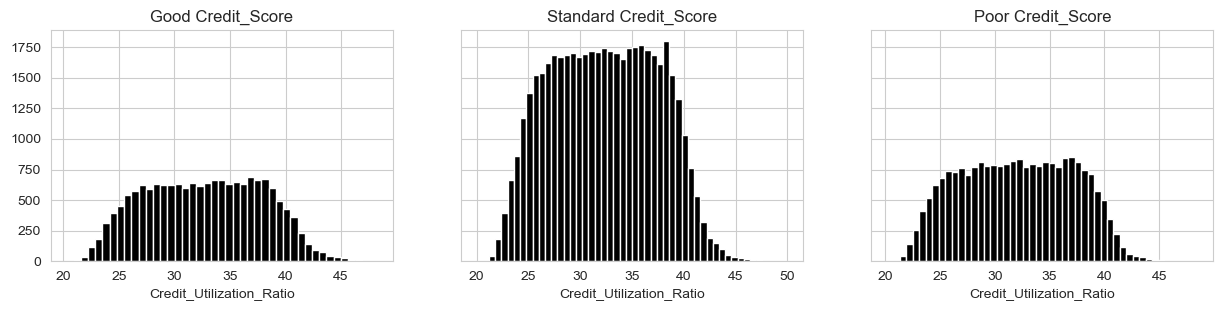

In [163]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (15, 3), sharey = True)

sns.distplot(train_data[train_data['Credit_Score'] == 'Good']['Credit_Utilization_Ratio'], kde = False, ax = ax1, color = 'black', hist_kws = {'alpha' : 1})
ax1.set_title('Good Credit_Score')

sns.distplot(train_data[train_data['Credit_Score'] == 'Standard']['Credit_Utilization_Ratio'], kde = False, ax = ax2,  color = 'black', hist_kws = {'alpha' : 1})
ax2.set_title('Standard Credit_Score')

sns.distplot(train_data[train_data['Credit_Score'] == 'Poor']['Credit_Utilization_Ratio'], kde = False, ax = ax3,  color = 'black', hist_kws = {'alpha' : 1})
ax3.set_title('Poor Credit_Score');

I don't see any patterns that lead me to think this variable would be valuable for predicting the Credit_Score of a person. In each category the variable is normalized and have equal median, so independ of their credit people usually use up to 32% of their credit. I would have thought that people with better credit used less of their credit ratio and people with poor credit use more, but statistics don't lie and that not showed.

I could go ahead and create a workaround using the yearly income but there is no reason to. Because indepent of the amount of money they spend the statistic showed that in most of the times it will always be around 32%. I would love to see who are those below and above 32% before deciding if droping or keeping the variable.

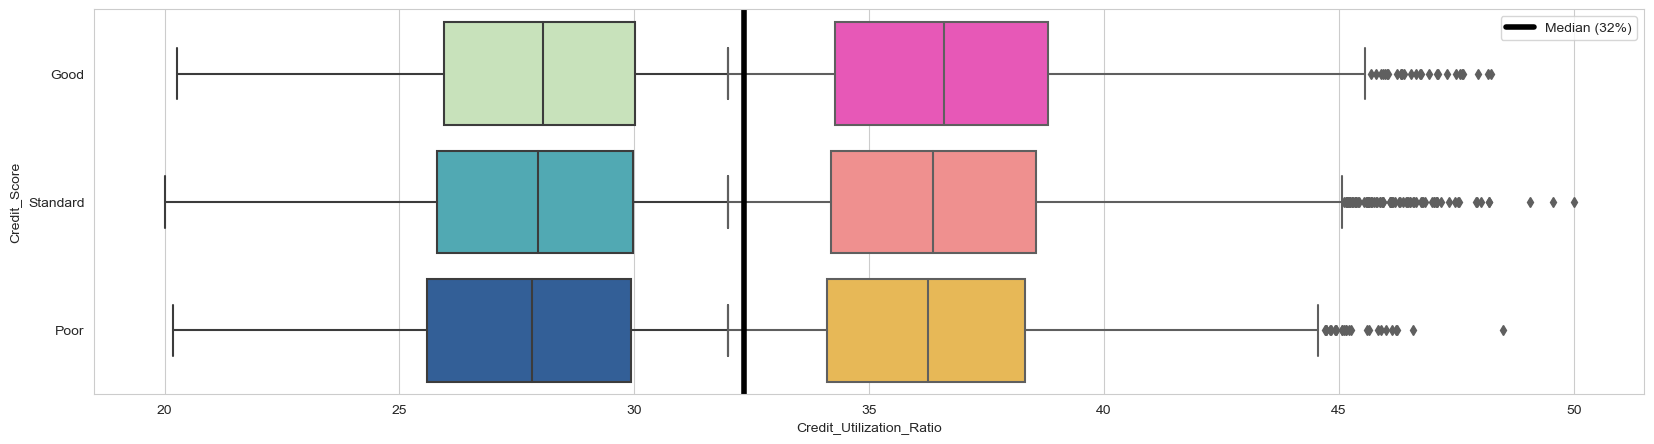

In [164]:
plt.figure(figsize = (20, 5))

sns.boxplot(data = train_data[train_data['Credit_Utilization_Ratio'] < 32], y = 'Credit_Score', x = 'Credit_Utilization_Ratio', palette = 'YlGnBu')
sns.boxplot(data = train_data[train_data['Credit_Utilization_Ratio'] > 32], y = 'Credit_Score', x = 'Credit_Utilization_Ratio', palette = 'spring')
plt.axvline(x = train_data['Credit_Utilization_Ratio'].mean(), linewidth = 4, color = 'black', label = 'Median (32%)')
plt.legend();

There is nothing that showed that this variable is important, should I remove it? I would like to see it perform in a multivariate classification by its feature importance and see how well does perform. In case is not performing as expected, I am just gonna remove it with all the other mentioned feature.

### Credit_History_Age
Represents the age of credit history of the person

In [165]:
train_data['Credit_History_Age'].nunique()

8251

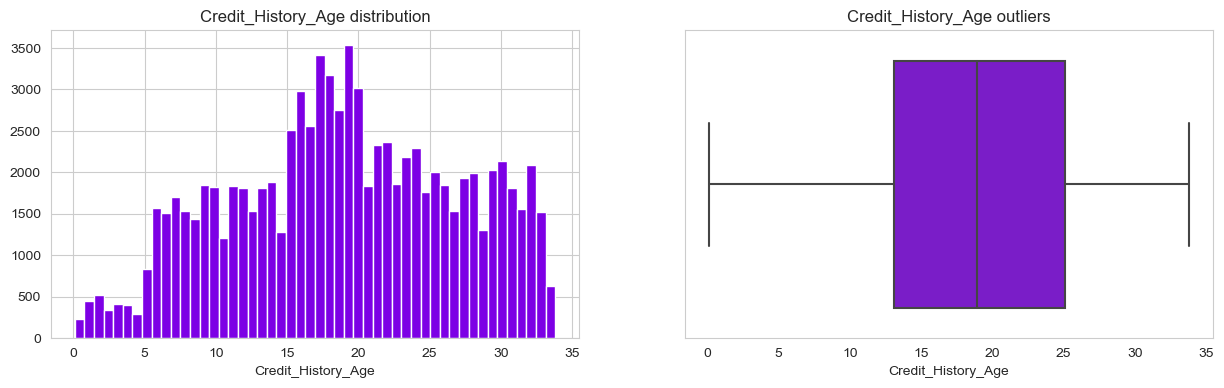

In [166]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 4))

sns.distplot(train_data['Credit_History_Age'], ax = ax1, color = '#7D00E5', kde = False, hist_kws = {'alpha' : 1})
ax1.set_title('Credit_History_Age distribution')

sns.boxplot(train_data['Credit_History_Age'], ax = ax2, color = '#7D00E5')
ax2.set_title('Credit_History_Age outliers')
ax2.grid(False);

In [167]:
pd.DataFrame(train_data['Credit_History_Age'].describe())

,Credit_History_Age
count,87233.00
mean,18.94
std,7.97
min,0.10
25%,13.10
50%,18.90
75%,25.11
max,33.80


#### Credit_History_Age vs. Target

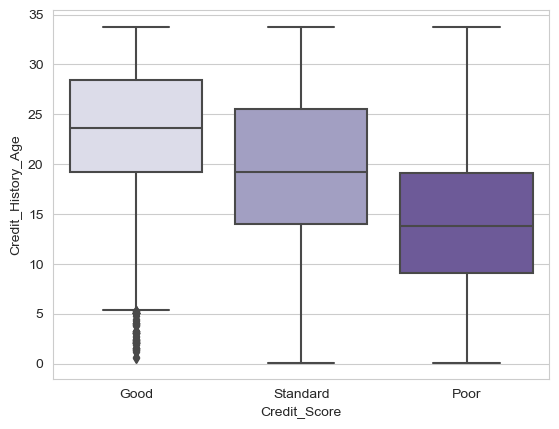

In [168]:
sns.boxplot(data = train_data, x = 'Credit_Score', y = 'Credit_History_Age', palette = 'Purples');

In [169]:
pd.DataFrame(train_data.groupby('Credit_Score').median()['Credit_History_Age'])

,Credit_History_Age
Credit_Score,
Good,23.60
Poor,13.80
Standard,19.20


People with poor credit score usually have less credit history age and people with good credit score have a higher age. This is a valuable feature for our model.

### Total_EMI_per_month
Represents the monthly EMI payments (in USD)

In [170]:
train_data['Total_EMI_per_month'].nunique()

13216

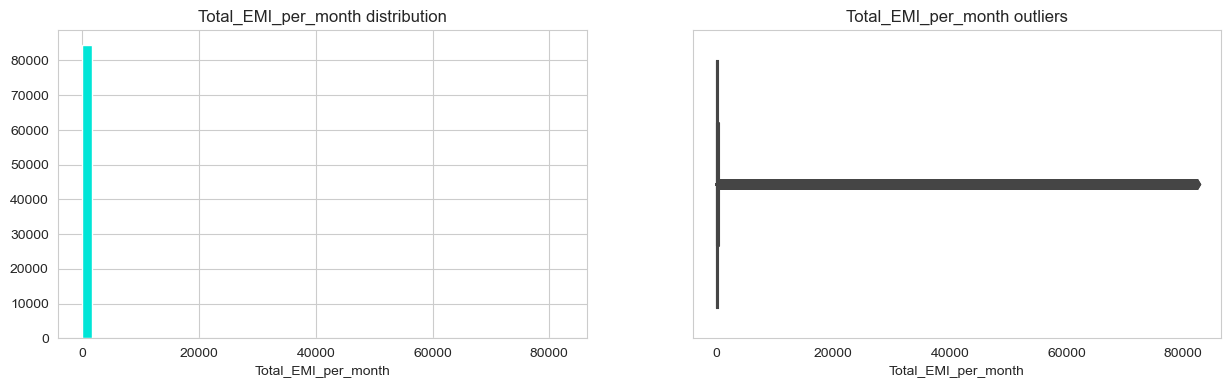

In [171]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 4))

sns.distplot(train_data['Total_EMI_per_month'], ax = ax1, color = '#00E5D7', kde = False, hist_kws = {'alpha' : 1})
ax1.set_title('Total_EMI_per_month distribution')

sns.boxplot(train_data['Total_EMI_per_month'], ax = ax2, color = '#00E5D7')
ax2.set_title('Total_EMI_per_month outliers')
ax2.grid(False);

It looks like most of the people have 0.0 EMI Payments, lets have a look at the statistics.

In [172]:
pd.DataFrame(train_data['Total_EMI_per_month'].describe())

,Total_EMI_per_month
count,87233.00
mean,1407.68
std,8317.14
min,0.00
25%,28.83
50%,68.31
75%,159.30
max,82331.00


Mean is 1400 and Median 68 so there is a lot of outliers in the sample. I need to compare if larger payments belong to good creditors and small payments to poor creditors in order to see if I remove or no the outliers.

#### Total_EMI_per_month vs. Target

In [173]:
round(pd.DataFrame(train_data.groupby('Credit_Score').agg(['mean', 'median'])['Total_EMI_per_month']))

,mean,median
Credit_Score,,
Good,1472.00,65.00
Poor,1363.00,77.00
Standard,1406.00,65.00


I rounded the values in order to reduce the noise and analyse it better. I can see that people with higher EMI Payments usually a poor credit score and people with good and standard credit score have around 65 EMI Payments. Let's see how many outliers this column have.  

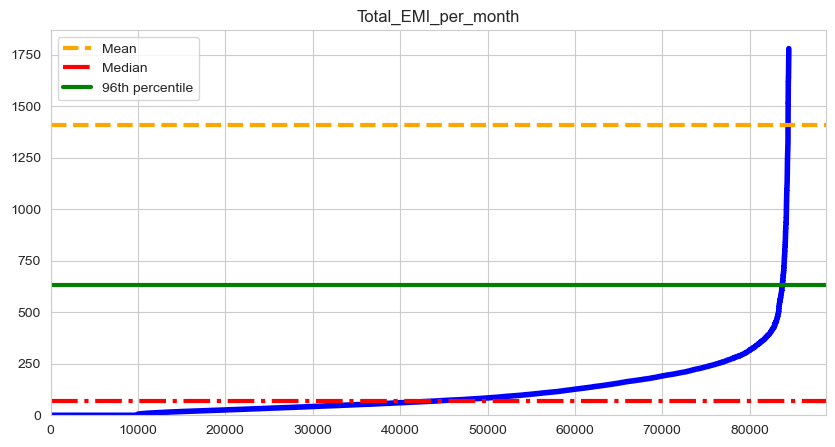

In [174]:
plt.figure(figsize = (10, 5))

plt.plot(sorted(train_data[train_data['Total_EMI_per_month'] < 1_800]['Total_EMI_per_month']), color = 'b', linewidth = 4)
plt.axhline(train_data['Total_EMI_per_month'].mean(), label = 'Mean', color = 'orange', linewidth = 3, linestyle = '--')
plt.axhline(train_data['Total_EMI_per_month'].median(), label = 'Median', linewidth = 3, linestyle = '-.', color = 'r')
plt.axhline(train_data['Total_EMI_per_month'].quantile(0.96), label = '96th percentile', linewidth = 3, color = 'g')


plt.legend()
plt.title('Total_EMI_per_month')
plt.xlim(0)
plt.ylim(0);

It looks like there actually a lot of outliers and they start from around 500. The 96th percentile is 629 while the max value is 82331 so I need to remove those outliers. Lets see how many outliers are above the 96th percentile.

In [175]:
train_data[train_data['Total_EMI_per_month'] > train_data['Total_EMI_per_month'].quantile(0.97)].count()[0]

2617

I am gonna remove those observations higher than the 97th percentile.

In [176]:
train_data = train_data[train_data['Total_EMI_per_month'] < train_data['Total_EMI_per_month'].quantile(0.97)]

test_data = test_data[test_data['Total_EMI_per_month'] < train_data['Total_EMI_per_month'].quantile(0.97)]

Now I am gonna analyse everything again.

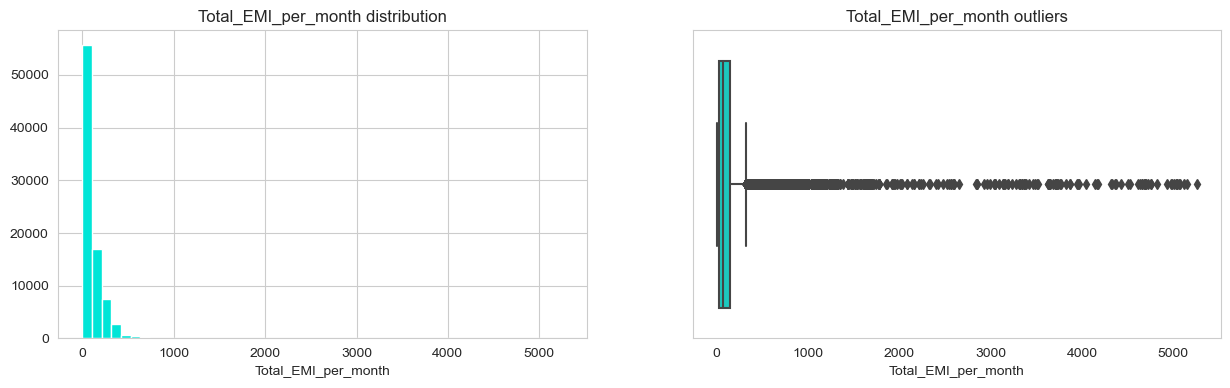

In [177]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 4))

sns.distplot(train_data['Total_EMI_per_month'], ax = ax1, color = '#00E5D7', kde = False, hist_kws = {'alpha' : 1})
ax1.set_title('Total_EMI_per_month distribution')

sns.boxplot(train_data['Total_EMI_per_month'], ax = ax2, color = '#00E5D7')
ax2.set_title('Total_EMI_per_month outliers')
ax2.grid(False);

In [178]:
pd.DataFrame(train_data['Total_EMI_per_month'].describe())

,Total_EMI_per_month
count,84616.00
mean,111.13
std,187.95
min,0.00
25%,27.78
50%,65.50
75%,146.05
max,5259.00


#### Total_EMI_per_month vs. Target

In [179]:
round(pd.DataFrame(train_data.groupby('Credit_Score').agg(['mean', 'median'])['Total_EMI_per_month']))

,mean,median
Credit_Score,,
Good,126.00,61.00
Poor,115.00,74.00
Standard,104.00,62.00


''

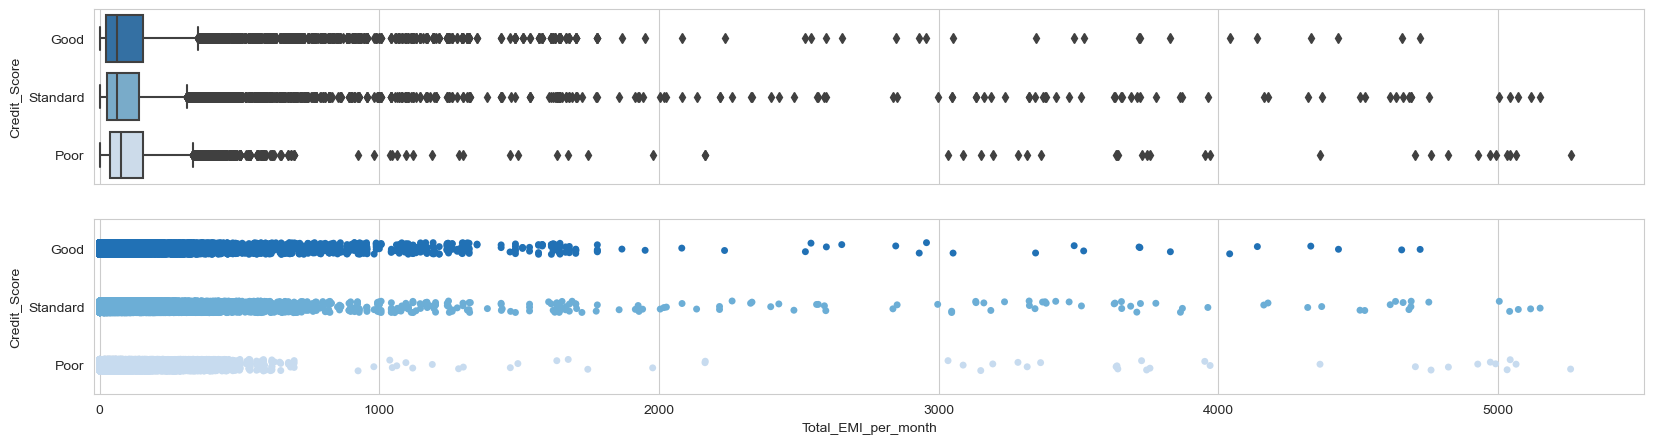

In [180]:
fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, sharex = True, figsize  = (20, 5))

sns.boxplot(data = train_data, y = 'Credit_Score', x = 'Total_EMI_per_month', palette = 'Blues_r', ax = ax1)
ax1.set_xlim(-20)
ax1.set_xlabel('')
sns.stripplot(data = train_data, y = 'Credit_Score', x = 'Total_EMI_per_month', palette = 'Blues_r' , jitter = True, ax = ax2)
ax2.set_xlim(-20)
;

After deleting the top outliers, I can see that Good creditors usually have a higher EMI Payment than poor creditors. So I managed to recover some value from this feature. 

### Amount_invested_monthly
Represents the monthly amount invested by the customer (in USD)


Amount_invested_monthly is a very particular column because it had a lot of missing values from the arbitrary value __ 10000 __ and It got filled by KKN Imputator, but I am really looking to drop this variable in case it has nothing to do with our target because more than 8% of the data were filled. 

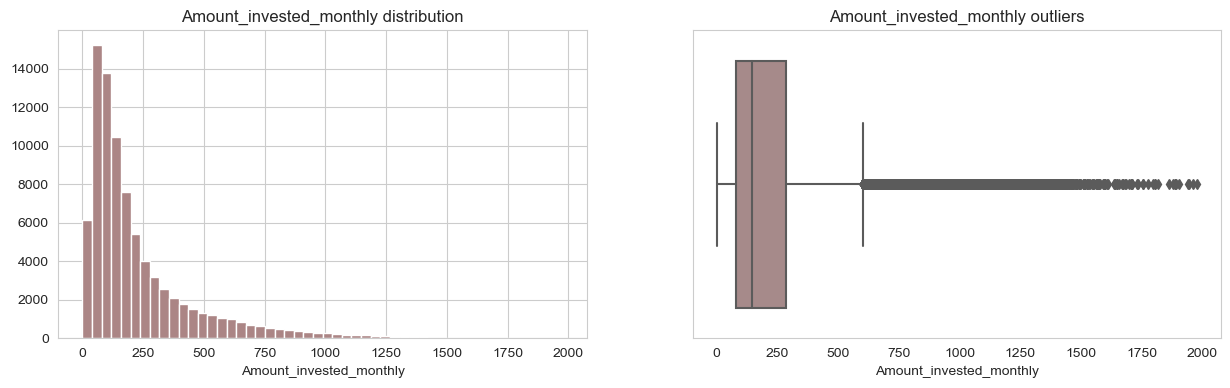

In [181]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 4))

sns.distplot(train_data['Amount_invested_monthly'], ax = ax1, color = '#AB8585', kde = False, hist_kws = {'alpha' : 1})
ax1.set_title('Amount_invested_monthly distribution')

sns.boxplot(train_data['Amount_invested_monthly'], ax = ax2, color = '#AB8585')
ax2.set_title('Amount_invested_monthly outliers')
ax2.grid(False);

In [182]:
pd.DataFrame(train_data['Amount_invested_monthly'].describe())

,Amount_invested_monthly
count,84616.00
mean,229.94
std,234.85
min,0.00
25%,78.56
50%,144.57
75%,287.44
max,1977.33


The data has a right skew and its median is 144. Lets see if this feature its a good predictor for our target.

#### Total_EMI_per_month vs. Target

In [183]:
pd.DataFrame(train_data.groupby('Credit_Score').agg(['mean', 'median'])['Amount_invested_monthly'])

,mean,median
Credit_Score,,
Good,293.02,175.34
Poor,188.78,125.68
Standard,227.50,145.41


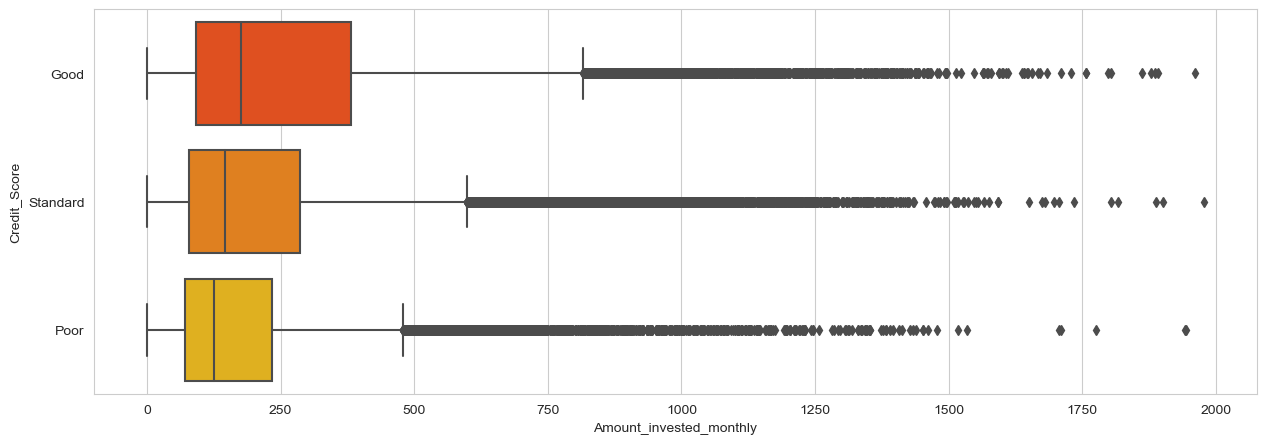

In [184]:
plt.figure(figsize = (15, 5))

sns.boxplot(data = train_data, y = 'Credit_Score', x = 'Amount_invested_monthly', palette = 'autumn');

It looks like Good creditors usually have more money invested monthly than poor creditors. So there value in this feature. 

### Monthly_Balance
Represents the monthly balance amount of the customer (in USD)

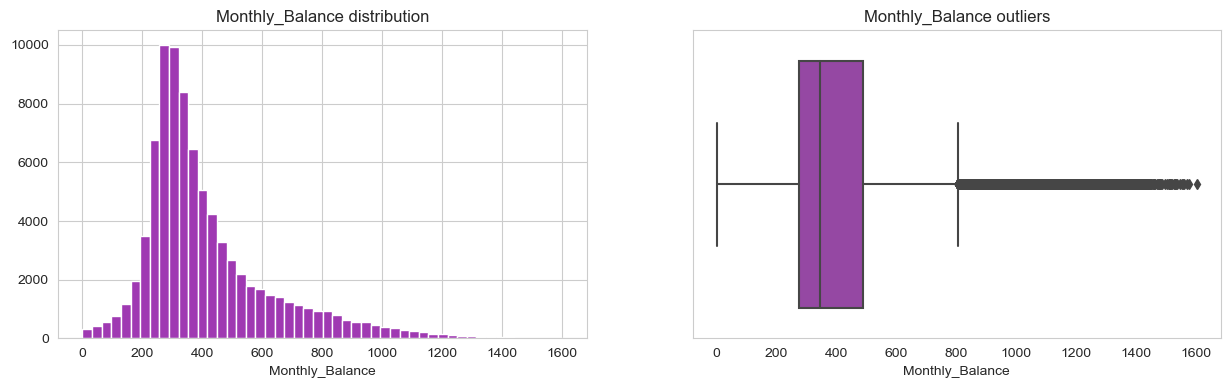

In [185]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 4))

sns.distplot(train_data['Monthly_Balance'], ax = ax1, color = '#9F39B2', kde = False, hist_kws = {'alpha' : 1})
ax1.set_title('Monthly_Balance distribution')

sns.boxplot(train_data['Monthly_Balance'], ax = ax2, color = '#9F39B2')
ax2.set_title('Monthly_Balance outliers')
ax2.grid(False);

In [186]:
pd.DataFrame(train_data['Monthly_Balance'].describe())

,Monthly_Balance
count,84616.00
mean,413.05
std,218.01
min,0.01
25%,275.26
50%,346.03
75%,487.18
max,1602.04


#### Monthly_Balance vs. Target

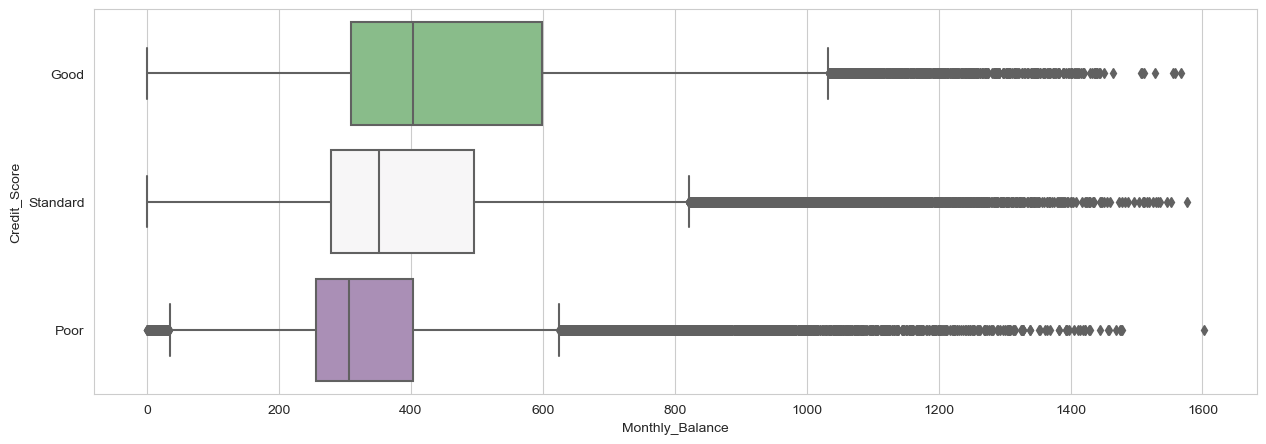

In [187]:
plt.figure(figsize = (15, 5))

sns.boxplot(data = train_data, y = 'Credit_Score', x = 'Monthly_Balance', palette = 'PRGn_r');

In [188]:
pd.DataFrame(train_data.groupby('Credit_Score').agg(['mean', 'median'])['Monthly_Balance'])

,mean,median
Credit_Score,,
Good,478.24,403.55
Poor,357.84,305.75
Standard,416.53,351.58


In average Poor credit_score people have less Montlhy_Balance than good credit_score people, so this feature is also valuable for our model. 

# Model, predict and solve the problem

## Data Preprocessing

### Dropping unnecessary variables

In [189]:
train_data = train_data.drop("ID Customer_ID SSN Month Name".split(), axis = 1)

test_data = test_data.drop("ID Customer_ID SSN Month Name".split(), axis = 1)

#### Reasons to drop

**ID:** Is the unique identifier of the submission, there is no predicting value from it.

**Customer_ID:** Is the unique identifier of each customer, there is no predicting value from it.

**SSN:** Is the unique Social Secure Number of each customer, for security reasons and no predicting value is dropped.

**Month:** Training data and Testing data are data from the same year cutted at an specific point, so there no way to consider this feature for training.

**Name:** It's just the client name, no predicting value from it.

### Predictors Encoding
In order to encode each feature I need to check Cardinality and Rare Labels to avoid errors.

In [190]:
ToEnconde = train_data.select_dtypes(include = 'O').columns
ToEnconde

Index(['Occupation', 'Type_of_Loan', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Mix', 'Credit_Score', 'Spent_Behaviour'],
      dtype='object')

#### Occupation

##### Cardinality

In [191]:
for test, occupation in enumerate(list(test_data['Occupation'].unique())):
    
    if occupation not in list(train_data['Occupation'].unique()):
        
        print(f'Cardinality test {test} failed')
        print(f'{occupation} not in train data')
    
    else:
        
        print(f'Cardinality test {test} passed')

Cardinality test 0 passed
Cardinality test 1 passed
Cardinality test 2 passed
Cardinality test 3 passed
Cardinality test 4 passed
Cardinality test 5 passed
Cardinality test 6 passed
Cardinality test 7 passed
Cardinality test 8 passed
Cardinality test 9 passed
Cardinality test 10 passed
Cardinality test 11 passed
Cardinality test 12 passed
Cardinality test 13 passed
Cardinality test 14 passed
Cardinality test 15 passed


##### Rare Labels

In [192]:
RareLabels = pd.DataFrame(index = train_data['Occupation'].unique())

RareLabels['Train Count'] = train_data['Occupation'].value_counts()

RareLabels['Test Count'] = test_data['Occupation'].value_counts()

RareLabels

,Train Count,Test Count
Scientist,5243,2107
Other,5987,2421
Teacher,5154,2080
Engineer,5420,2226
Developer,5309,2316
Lawyer,5585,2367
Media_Manager,5286,2247
Doctor,5257,2126
Journalist,5168,2114
Entrepreneur,5279,2199


Occupation has no Cardinality to worry about and rare labels has already been label as "Other". I can enconde now.
##### Encoding

In [193]:
TrainOccupationEncoding = pd.get_dummies(train_data['Occupation'], drop_first = True)

TestOccupationEncoding = pd.get_dummies(test_data['Occupation'], drop_first = True)

TrainOccupationEncoding.rename(columns={'Other': 'OtherOccupation'},
          inplace=True, errors='raise')

TestOccupationEncoding.rename(columns={'Other': 'OtherOccupation'},
          inplace=True, errors='raise')

In [194]:
train_data = pd.concat([train_data, TrainOccupationEncoding], axis = 1)

test_data = pd.concat([test_data, TestOccupationEncoding], axis = 1)

In [195]:
train_data = train_data.drop('Occupation', axis = 1)

test_data = test_data.drop('Occupation', axis = 1)

#### Type_of_Loan
##### Cardinality

In [196]:
for test, occupation in enumerate(list(test_data['Type_of_Loan'].unique())):
    
    if occupation not in list(train_data['Type_of_Loan'].unique()):
        
        print(f'Cardinality test {test} failed')
        print(f'{occupation} not in train data')
    
    else:
        
        print(f'Cardinality test {test} passed')

Cardinality test 0 passed
Cardinality test 1 passed
Cardinality test 2 passed
Cardinality test 3 passed
Cardinality test 4 passed
Cardinality test 5 passed
Cardinality test 6 passed
Cardinality test 7 passed
Cardinality test 8 passed
Cardinality test 9 passed


##### Rare Labels

In [197]:
RareLabels = pd.DataFrame(index = train_data['Type_of_Loan'].unique())

RareLabels['Train Count'] = train_data['Type_of_Loan'].value_counts()

RareLabels['Test Count'] = test_data['Type_of_Loan'].value_counts()

RareLabels

,Train Count,Test Count
Auto Loan,7998,3193
Credit-Builder Loan,8848,3674
None,10344,4587
Other,8239,3458
Personal Loan,8524,3600
Payday Loan,8397,3357
Mortgage Loan,8046,3232
Home Equity Loan,7888,3151
Debt Consolidation Loan,8100,3376
Student Loan,8232,3384


Type_of_Loan also has no Cardinality to worry about and rare labels has already been label as "Other". I can enconde now.

##### Encoding

In [198]:
TrainType_of_LoanEncoding = pd.get_dummies(train_data['Type_of_Loan'], drop_first = True)

TestType_of_LoanEncoding = pd.get_dummies(test_data['Type_of_Loan'], drop_first = True)

TrainType_of_LoanEncoding.rename(columns = {'Other': 'OtherTypeOfLoan'},
          inplace = True, errors = 'raise')

TestType_of_LoanEncoding.rename(columns = {'Other': 'OtherTypeOfLoan'},
          inplace = True, errors = 'raise')

In [199]:
train_data = pd.concat([train_data, TrainType_of_LoanEncoding], axis = 1)

test_data = pd.concat([test_data, TestType_of_LoanEncoding], axis = 1)

In [200]:
train_data = train_data.drop('Type_of_Loan', axis = 1)

test_data = test_data.drop('Type_of_Loan', axis = 1)

#### Payment_of_Min_Amount
##### Cardinality

There is no need to check Cardinality because it is a Bool.

##### Rare Labels

In [201]:
RareLabels = pd.DataFrame(index = train_data['Payment_of_Min_Amount'].unique())

RareLabels['Train Count'] = train_data['Payment_of_Min_Amount'].value_counts()

RareLabels['Test Count'] = test_data['Payment_of_Min_Amount'].value_counts()

RareLabels

,Train Count,Test Count
No,32391,14223
Yes,52225,20789


##### Encoding

In [202]:
train_data['Payment_of_Min_Amount'] = train_data['Payment_of_Min_Amount'].map({'No' : 0, 'Yes' : 1})

test_data['Payment_of_Min_Amount'] = test_data['Payment_of_Min_Amount'].map({'No' : 0, 'Yes' : 1})

#### Payment_Behaviour
##### Cardinality

In [203]:
for test, occupation in enumerate(list(test_data['Payment_Behaviour'].unique())):
    
    if occupation not in list(train_data['Payment_Behaviour'].unique()):
        
        print(f'Cardinality test {test} failed')
        print(f'{occupation} not in train data')
    
    else:
        
        print(f'Cardinality test {test} passed')

Cardinality test 0 passed
Cardinality test 1 passed
Cardinality test 2 passed


##### Rare Labels

In [204]:
RareLabels = pd.DataFrame(index = train_data['Payment_Behaviour'].unique())

RareLabels['Train Count'] = train_data['Payment_Behaviour'].value_counts()

RareLabels['Test Count'] = test_data['Payment_Behaviour'].value_counts()

RareLabels

,Train Count,Test Count
Small value,37111,15409
Large value,20741,8519
Medium value,26764,11084


##### Encoding

In [205]:
TrainPayment_BehaviourEncoding = pd.get_dummies(train_data['Payment_Behaviour'], drop_first = True)

TestPayment_BehaviourEncoding = pd.get_dummies(test_data['Payment_Behaviour'], drop_first = True)

In [206]:
train_data = pd.concat([train_data, TrainPayment_BehaviourEncoding], axis = 1)

test_data = pd.concat([test_data, TestPayment_BehaviourEncoding], axis = 1)

In [207]:
train_data = train_data.drop('Payment_Behaviour', axis = 1)

test_data = test_data.drop('Payment_Behaviour', axis = 1)

#### Spent_Behaviour
##### Cardinality

In [208]:
for test, occupation in enumerate(list(test_data['Spent_Behaviour'].unique())):
    
    if occupation not in list(train_data['Spent_Behaviour'].unique()):
        
        print(f'Cardinality test {test} failed')
        print(f'{occupation} not in train data')
    
    else:
        
        print(f'Cardinality test {test} passed')

Cardinality test 0 passed
Cardinality test 1 passed


##### Rare Labels

In [209]:
RareLabels = pd.DataFrame(index = train_data['Spent_Behaviour'].unique())

RareLabels['Train Count'] = train_data['Spent_Behaviour'].value_counts()

RareLabels['Test Count'] = test_data['Spent_Behaviour'].value_counts()

RareLabels

,Train Count,Test Count
High spent,36592,15098
Low spent,48024,19914


##### Encoding

In [210]:
train_data['Spent_Behaviour'] = train_data['Spent_Behaviour'].map({'Low spent' : 0, 'High spent' : 1})

test_data['Spent_Behaviour'] = test_data['Spent_Behaviour'].map({'Low spent' : 0, 'High spent' : 1})

#### Credit_Mix
##### Cardinality

In [211]:
for test, occupation in enumerate(list(test_data['Credit_Mix'].unique())):
    
    if occupation not in list(train_data['Credit_Mix'].unique()):
        
        print(f'Cardinality test {test} failed')
        print(f'{occupation} not in train data')
    
    else:
        
        print(f'Cardinality test {test} passed')

Cardinality test 0 passed
Cardinality test 1 passed
Cardinality test 2 passed


##### Rare Labels

In [212]:
RareLabels = pd.DataFrame(index = train_data['Credit_Mix'].unique())

RareLabels['Train Count'] = train_data['Credit_Mix'].value_counts()

RareLabels['Test Count'] = test_data['Credit_Mix'].value_counts()

RareLabels

,Train Count,Test Count
Normal,50063,21695
Outstanding,22128,9741
Bad,12425,3576


##### Encoding

In [213]:
TrainCredit_MixEncoding = pd.get_dummies(train_data['Credit_Mix'], drop_first = True)

TestCredit_MixEncoding = pd.get_dummies(test_data['Credit_Mix'], drop_first = True)

In [214]:
train_data = pd.concat([train_data, TrainCredit_MixEncoding], axis = 1)

test_data = pd.concat([test_data, TestCredit_MixEncoding], axis = 1)

In [215]:
train_data = train_data.drop('Credit_Mix', axis = 1)

test_data = test_data.drop('Credit_Mix', axis = 1)

### Target Encoding

In [216]:
train_data['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [217]:
TargetMap = {'Standard' : 0, 'Good' : 1, 'Poor' : 2}

train_data['Credit_Score'] = train_data['Credit_Score'].map(TargetMap)

In [218]:
train_data['Credit_Score'].unique()

array([1, 0, 2], dtype=int64)

### Re-organized features
Before scaler I need to make sure the feature in train and test are in the same order.

In [219]:
train_data.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Spent_Behaviour', 'Architect', 'Developer', 'Doctor', 'Engineer',
       'Entrepreneur', 'Journalist', 'Lawyer', 'Manager', 'Mechanic',
       'Media_Manager', 'Musician', 'OtherOccupation', 'Scientist', 'Teacher',
       'Writer', 'Credit-Builder Loan', 'Debt Consolidation Loan',
       'Home Equity Loan', 'Mortgage Loan', 'None', 'OtherTypeOfLoan',
       'Payday Loan', 'Personal Loan', 'Student Loan', 'Medium value',
       'Small value', 'Normal', 'Outstanding'],
      dtype='object')

In [220]:
cols = ['Credit_Score', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance',
       'Spent_Behaviour', 'Architect', 'Developer', 'Doctor', 'Engineer',
       'Entrepreneur', 'Journalist', 'Lawyer', 'Manager', 'Mechanic',
       'Media_Manager', 'Musician', 'OtherOccupation', 'Scientist', 'Teacher',
       'Writer', 'Credit-Builder Loan', 'Debt Consolidation Loan',
       'Home Equity Loan', 'Mortgage Loan', 'None', 'OtherTypeOfLoan',
       'Payday Loan', 'Personal Loan', 'Student Loan', 'Medium value',
       'Small value', 'Normal', 'Outstanding']

train_data = train_data[cols]

Now I will verify order (Since target is not in testing data, Ill start counting from the second feature in training.)

In [221]:
for item in range(test_data.shape[1] - 1):

    print(f"{item} (Train) {train_data.drop('Credit_Score', axis = 1).columns[item]}")
    print(f"{item} (Test) {test_data.columns[item]}")
    print('-'*10)

0 (Train) Age
0 (Test) Age
----------
1 (Train) Annual_Income
1 (Test) Annual_Income
----------
2 (Train) Monthly_Inhand_Salary
2 (Test) Monthly_Inhand_Salary
----------
3 (Train) Num_Bank_Accounts
3 (Test) Num_Bank_Accounts
----------
4 (Train) Num_Credit_Card
4 (Test) Num_Credit_Card
----------
5 (Train) Interest_Rate
5 (Test) Interest_Rate
----------
6 (Train) Num_of_Loan
6 (Test) Num_of_Loan
----------
7 (Train) Delay_from_due_date
7 (Test) Delay_from_due_date
----------
8 (Train) Num_of_Delayed_Payment
8 (Test) Num_of_Delayed_Payment
----------
9 (Train) Changed_Credit_Limit
9 (Test) Changed_Credit_Limit
----------
10 (Train) Num_Credit_Inquiries
10 (Test) Num_Credit_Inquiries
----------
11 (Train) Outstanding_Debt
11 (Test) Outstanding_Debt
----------
12 (Train) Credit_Utilization_Ratio
12 (Test) Credit_Utilization_Ratio
----------
13 (Train) Credit_History_Age
13 (Test) Credit_History_Age
----------
14 (Train) Payment_of_Min_Amount
14 (Test) Payment_of_Min_Amount
----------
15 (

In [222]:
train_data.shape, test_data.shape

((84616, 48), (35012, 47))

## Data & Model settings

### Declare trainning inputs and outputs.

In [223]:
# First I need to forget the old index (Because I removed over 15k observations)

train_data.reset_index(drop = True, inplace = True)

test_data.reset_index(drop = True, inplace = True)

In [224]:
X = train_data.drop('Credit_Score', axis = 1)

#X = train_data.drop(['Credit_Score', 'Spent_Behaviour', 'Architect', 'Developer', 'Doctor', 'Engineer',
 #      'Entrepreneur', 'Journalist', 'Lawyer', 'Manager', 'Mechanic',
  #     'Media_Manager', 'Musician', 'OtherOccupation', 'Scientist', 'Teacher',
   #    'Writer', 'Credit-Builder Loan', 'Debt Consolidation Loan',
    #   'Home Equity Loan', 'Mortgage Loan', 'None', 'OtherTypeOfLoan',
     #  'Payday Loan', 'Personal Loan', 'Student Loan', 'Medium value',
      # 'Small value'], axis = 1)

X_test = test_data

y = train_data['Credit_Score']

### Performance & Error Metrics

<bs>
    <bs>


#### ROC AUC 
The ROC AUC score tells us how efficient the model is. The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes. An AUC score of 1 means the classifier can perfectly distinguish between all the Positive and the Negative class points.

#### Accuracy 
Number of correct predictions made by the model devided by the total number of predictions. Is useful when target classes are well balanced

### Cohen’s Kappa score

Cohen’s Kappa score is a a supercharged version of accuracy, a version that also integrates measurements of chance and class imbalance.

### Recall

The recall is the ratio `tp / (tp + fn)`where `tp`is the number of true positives and `fn`the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

### Precision

The precision is the ratio `tp / (tp + fp)`where `tp`is the number of true positives and `fp`the number of false positives. The precision is intuitively the ability of the classifier not to label a negative sample as positive.

### F1-score

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0. The F-beta score weights recall more than precision by a factor of `beta`. `beta == 1.0` means recall and precision are equally important.


In [225]:
from sklearn.metrics import roc_auc_score, accuracy_score, cohen_kappa_score, precision_score, recall_score, f1_score

### Model selection

I have understand that this is a multi class classification problem, so I will need a multi class classification algorithm in order to solve the problem. Algorithms that are designed for binary classification can be adapted for use for multi-class problems.

This involves using a strategy of fitting multiple binary classification models for each class vs. all other classes (called one-vs-rest) or one model for each pair of classes (called one-vs-one).

One-vs-Rest: Fit one binary classification model for each class vs. all other classes.
One-vs-One: Fit one binary classification model for each pair of classes.

So I am gonna start with:

- k-Nearest Neighbors.
- Random Forest.
- Gradient Boosting.

I could probably go outside of my objective of mainting a low deployment by implementing some tensorflow keras algorithm If I fell is necessary. 

For now I would like to try the ones listed before, first with default setting then boosted.

In [226]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [227]:
# Creating a List of the models

Models = [KNeighborsClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]

ModelsName = ['KNeighbors', 'RandomForest', 'GradientBoosting']

In order to pick one of the 3 models selected I am gonna implement Cross Validation.

## Cross Validation

### Understanding target

In order to implement Cross Validation I need to understand the multi-class target

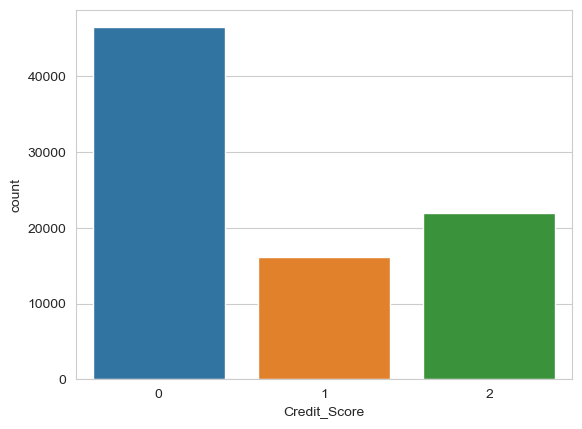

In [228]:
sns.countplot(train_data['Credit_Score']);

In [229]:
TargetMap

{'Standard': 0, 'Good': 1, 'Poor': 2}

### Baseline scores
#### ZeroR value

In [230]:
ZeroR = accuracy_score(y, np.zeros_like(y))
ZeroR

0.5493287321546753

The classes are unbalanced and is relative an small sample, so it is important to understand the ZeroR score, a ZeroR score is the score I will get if I predict everything as zero, this means if the model only predicts zero (Standard), it will get an score of 0.54, in order to get a good model I will have to get an score higher than that. 

#### Random Rate Classifier (Weighted Guessing)

In [231]:
# Get % of each class

pd.DataFrame(train_data['Credit_Score'].value_counts() / len(train_data))

,Credit_Score
0,0.55
2,0.26
1,0.19


In [232]:
# Get metric

WeightedG = 0.55 ** 2 + 0.26 ** 2 + 0.19 ** 2
WeightedG

0.40620000000000006

Our weightedG score is roughly 0.41, so our model has to score at least 0.41 to be useful, I will take into consideration the ZeroR in this case and for the cross validation the best option is to implement the StratifiedKFold method from sklearn for this part.

### Importing a Scaler

In [233]:
from sklearn.preprocessing import MinMaxScaler

### Creating & Running the Cross Validation

Since I am interest in many metrics I cannot use cross_val_score, I will need to create a function to get and record the metrics results from each fold. This might be a large function So I am hidding it.

In [234]:
Score, ACC, AUC, CKP, FoldSum, NameSum, Precision, Recall, F1 = list(), list(), list(), list(), list(), list(), list(), list(), list()

def get_scores(classifier, name, X_train, X_validation, y_train, y_validation):
    
    # Scale the data
    
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_validation = scaler.transform(X_validation)
    
    # Fit the model
    
    classifier.fit(X_train, y_train)
    
    # Get the predictions
    
    prediction = classifier.predict(X_validation)
    proba_prediction = classifier.predict_proba(X_validation)
    
    # Recording results
        
    NameSum.append(ModelsName[name])
    Score.append(classifier.score(X_validation, y_validation))
    ACC.append(accuracy_score(y_validation, prediction))
    AUC.append(roc_auc_score(y_validation, proba_prediction, 
                             average = "weighted", multi_class = "ovr"))
    CKP.append(cohen_kappa_score(y_validation, prediction))
    Precision.append(precision_score(y_validation, prediction, average = 'weighted'))
    Recall.append(recall_score(y_validation, prediction, average = 'weighted'))
    F1.append(f1_score(y_validation, prediction, average = 'weighted'))

Now I can create the StratifiedKFold CV

In [235]:
from sklearn.model_selection import StratifiedKFold

SGK = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

Running Cross validation through all the models. this might take a while.

In [236]:
for train_index, validation_index in SGK.split(X, y):
    
    # Creating each fold dataset

    X_train, y_train = X.loc[train_index], y.loc[train_index]
  
    X_validation, y_validation = X.loc[validation_index], y.loc[validation_index]
    
    # Run the function
    
    for name, model in enumerate(Models):
        
        get_scores(model, name, X_train, X_validation, y_train, y_validation)

### Cross Validation Summary

In [237]:
CVSummary = pd.DataFrame()
CVSummary['Model'] = NameSum
CVSummary['Model Score'] = Score
CVSummary['Accuracy'] = ACC
CVSummary['ZeroR Diff'] = CVSummary['Accuracy'] - ZeroR
CVSummary['ZeroR Diff %'] = round(np.absolute(CVSummary['ZeroR Diff'] / CVSummary['Accuracy'] * 100), 2)
CVSummary['WeightedG Diff'] = CVSummary['Accuracy'] - WeightedG
CVSummary['WeightedG Diff %'] = round(np.absolute(CVSummary['WeightedG Diff'] / CVSummary['Accuracy'] * 100), 2)
CVSummary['Precision Score'] = Precision
CVSummary['Recall Score'] = Recall
CVSummary['F1 Score'] = F1
CVSummary['ROC AUC Score'] = AUC
CVSummary["Cohen's Kappa"] = CKP

CVSummary.sort_values('Model', ascending = False)

,Model,Model Score,Accuracy,ZeroR Diff,ZeroR Diff %,WeightedG Diff,WeightedG Diff %,Precision Score,Recall Score,F1 Score,ROC AUC Score,Cohen's Kappa
1,RandomForest,0.79,0.79,0.24,30.28,0.38,48.45,0.79,0.79,0.79,0.90,0.64
4,RandomForest,0.79,0.79,0.24,30.82,0.39,48.84,0.79,0.79,0.79,0.90,0.65
7,RandomForest,0.79,0.79,0.24,30.11,0.38,48.32,0.79,0.79,0.79,0.90,0.64
10,RandomForest,0.79,0.79,0.24,30.61,0.39,48.69,0.79,0.79,0.79,0.90,0.65
13,RandomForest,0.79,0.79,0.24,30.67,0.39,48.73,0.79,0.79,0.79,0.90,0.65
0,KNeighbors,0.65,0.65,0.10,15.00,0.24,37.15,0.64,0.65,0.64,0.76,0.38
3,KNeighbors,0.65,0.65,0.10,14.95,0.24,37.11,0.64,0.65,0.64,0.77,0.37
6,KNeighbors,0.65,0.65,0.10,15.56,0.24,37.56,0.64,0.65,0.64,0.77,0.38
9,KNeighbors,0.66,0.66,0.11,16.19,0.25,38.03,0.65,0.66,0.65,0.77,0.39
12,KNeighbors,0.65,0.65,0.10,15.12,0.24,37.23,0.64,0.65,0.64,0.76,0.38


All our models managed to pass with 15% or more the ZeroR this means all are useful, it looks like Random Forest had a better performance than the other models. So my focus will be in getting better results by tunning the random forest model.

In [238]:
CVSummary[CVSummary['Model'] == 'RandomForest'][['Model', 'Model Score', 'ROC AUC Score', 'Accuracy', 'Precision Score', 'Recall Score', 'F1 Score']]

,Model,Model Score,ROC AUC Score,Accuracy,Precision Score,Recall Score,F1 Score
1,RandomForest,0.79,0.90,0.79,0.79,0.79,0.79
4,RandomForest,0.79,0.90,0.79,0.79,0.79,0.79
7,RandomForest,0.79,0.90,0.79,0.79,0.79,0.79
10,RandomForest,0.79,0.90,0.79,0.79,0.79,0.79
13,RandomForest,0.79,0.90,0.79,0.79,0.79,0.79


The AUC Score is pretty decent with 0.90, this means that the model can distinguish up to a 90% of the class points, accuracy was 0.79 so I might have to work a little on that together with Precision, Recall and F1 score. The model is useful and it can be tunned. I would love to look at the classification report too. For now we can start thinking of tunning.

## Hyper Parameter Tuning


In [239]:
# Creating a testing model
model = RandomForestClassifier()

# Current parameters
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

I am looking to tune the next parameters:

**criterion:** The function to measure the quality of a split.

**max_depth:** max number of levels in each decision tree

**min_samples_split:** min number of data points placed in a node before the node is split

**min_samples_leaf:** min number of data points allowed in a leaf node

**bootstrap:**  method for sampling data points (with or without replacement)

----------------

In [240]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'criterion': ['gini', 'entropy'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 4, 10],
               'min_samples_leaf': [1, 2, 3],
               'bootstrap': [True, False]}

In [241]:
# scaler = MinMaxScaler()
# scaler.fit_transform(X)

# ModelRandom = RandomizedSearchCV(estimator = model, param_distributions = grid, 
#                                 n_iter = 100, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)

# ModelRandom.fit(scaler, y)

In [242]:
# ModelRandom.best_params_

# {'n_estimators' : 400,
# 'criterion' : 'entropy',
# 'bootstrap': False,
# 'max_depth': 30,
# 'min_samples_leaf': 3,
# 'min_samples_split': 4,
# 'n_estimators': 400}

# I markeddown the cell so it doesnt run again.

### Hyper Parameter testing

In order to test the parameters I am gonna create another cross validation

In [243]:
RandomForestSGK = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [244]:
Score, ACC, AUC, Precision, Recall, F1 = list(), list(), list(), list(), list(), list()

for train_index, validation_index in RandomForestSGK.split(X, y):
    
    # Creating each fold dataset

    X_train, y_train = X.loc[train_index], y.loc[train_index]
  
    X_validation, y_validation = X.loc[validation_index], y.loc[validation_index]
    
    # Scale the X's
    
    scaler = MinMaxScaler()
    
    X_train = scaler.fit_transform(X_train)
    
    X_validation = scaler.transform(X_validation)
    
    # Trained and fit the model
    
    model = RandomForestClassifier(bootstrap = False, criterion = 'entropy', n_estimators = 400, 
                                   max_depth = 30, min_samples_leaf = 3, min_samples_split = 4)
    
    model.fit(X_train, y_train)    
    
    # Get the predictions
    
    prediction = model.predict(X_validation)
    proba_prediction = model.predict_proba(X_validation)
    
    # Record results
    
    Score.append(model.score(X_validation, y_validation))
    ACC.append(accuracy_score(y_validation, prediction))
    AUC.append(roc_auc_score(y_validation, proba_prediction, 
                             average = "weighted", multi_class = "ovr"))
    
    Precision.append(precision_score(y_validation, prediction, average = 'weighted'))
    Recall.append(recall_score(y_validation, prediction, average = 'weighted'))
    F1.append(f1_score(y_validation, prediction, average = 'weighted'))

In [245]:
print('----------------------------------------------- Score -----------------------------------------------')
print('\n')
print(Score)
print('\n')
print('----------------------------------------------- Accuracy -----------------------------------------------')
print('\n')
print(ACC)
print('\n')
print('----------------------------------------------- ROC AUC -----------------------------------------------')
print('\n')
print(AUC)
print('\n')
print('----------------------------------------------- Precision -----------------------------------------------')
print('\n')
print(Precision)
print('\n')
print('----------------------------------------------- Recall -----------------------------------------------')
print('\n')
print(Recall)
print('\n')
print('----------------------------------------------- F1 -----------------------------------------------')
print('\n')
print(F1)

----------------------------------------------- Score -----------------------------------------------


[0.7941385015362799, 0.795426342847013, 0.7914081427642853, 0.7965490752230692, 0.7967854399338179]


----------------------------------------------- Accuracy -----------------------------------------------


[0.7941385015362799, 0.795426342847013, 0.7914081427642853, 0.7965490752230692, 0.7967854399338179]


----------------------------------------------- ROC AUC -----------------------------------------------


[0.9011713593886299, 0.903429458109325, 0.9017225268364153, 0.9039153446571122, 0.8997544112999257]


----------------------------------------------- Precision -----------------------------------------------


[0.7936470171451999, 0.794794587514936, 0.7909900408908846, 0.7961791142611786, 0.7965624343971536]


----------------------------------------------- Recall -----------------------------------------------


[0.7941385015362799, 0.795426342847013, 0.7914081427642853, 0.

The performance of the metrics are very stable for an unbalanced problem so this is good. I will need to look at each independent class in order to see the real performance.

In [246]:
# Classification report

from sklearn.metrics import classification_report

print(classification_report(y_validation, prediction))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      9297
           1       0.75      0.72      0.74      3229
           2       0.78      0.80      0.79      4397

    accuracy                           0.80     16923
   macro avg       0.78      0.78      0.78     16923
weighted avg       0.80      0.80      0.80     16923



It looks like for the model is harder to predict 1's or good creditors, since its an unbalanced sample it was expected.

In [247]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_validation, prediction), columns = ['Predicted: 0','Predicted: 1', 'Predicted: 2'], index = ['Real: 0','Real: 1', 'Real: 2'])

,Predicted: 0,Predicted: 1,Predicted: 2
Real: 0,7628,713,956
Real: 1,866,2338,25
Real: 2,809,70,3518


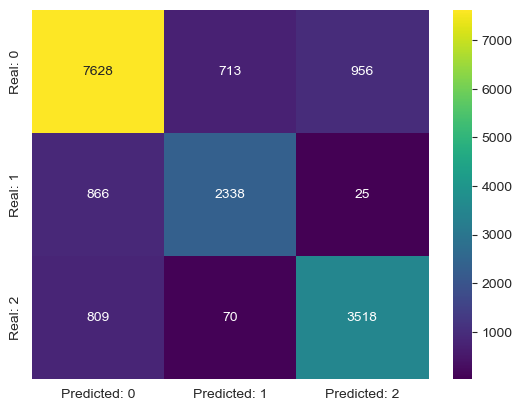

In [248]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_validation, prediction), columns = ['Predicted: 0','Predicted: 1', 'Predicted: 2'], index = ['Real: 0','Real: 1', 'Real: 2']),
           annot = True, fmt = 'g', cmap = 'viridis');

For the model is easier to predict 1 and 2 as 0 than 1 as 2 and 2 as 1. This is good because it tells me that the model can really distinguished between poor and good credit score. This is only taking into consideration the last iteration of the cross validation, since all the fold had similar performance I can say that this is the normal behaviour of the model while predicting. Before I solve the problem using Random Forest, I want to have a picture of what performance a keras NN would have in this situation.

### Keras NN

#### Load TF

In [249]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

#### Create train and validation data

In [250]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X.values, y.values, test_size = 0.20, random_state = 101)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_validation = scaler.transform(X_validation)

y_train_transformed = tf.keras.utils.to_categorical(y_train, num_classes = 3)

y_validation_transformed = tf.keras.utils.to_categorical(y_validation, num_classes = 3)

#### Create the NN

In [251]:
# Model
model = Sequential()

# input layer
model.add(Dense(48, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units = 3, activation='softmax'))

# Compile
model.compile(loss = "categorical_crossentropy", optimizer = "adam")

#### Early stop call

In [252]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

#### Train the NN

In [253]:
model.fit(x = X_train, y = y_train_transformed, epochs = 500, validation_data = (X_validation, y_validation_transformed), callbacks = [early_stop])

Epoch 1/500
2116/2116 [==============================] - 7s 3ms/step - loss: 0.8337 - val_loss: 0.7564
Epoch 2/500
2116/2116 [==============================] - 7s 3ms/step - loss: 0.7576 - val_loss: 0.7291
Epoch 3/500
2116/2116 [==============================] - 6s 3ms/step - loss: 0.7379 - val_loss: 0.7196
Epoch 4/500
2116/2116 [==============================] - 5s 2ms/step - loss: 0.7283 - val_loss: 0.7116
Epoch 5/500
2116/2116 [==============================] - 5s 2ms/step - loss: 0.7221 - val_loss: 0.7088
Epoch 6/500
2116/2116 [==============================] - 5s 2ms/step - loss: 0.7176 - val_loss: 0.7033
Epoch 7/500
2116/2116 [==============================] - 5s 2ms/step - loss: 0.7149 - val_loss: 0.7014
Epoch 8/500
2116/2116 [==============================] - 5s 2ms/step - loss: 0.7123 - val_loss: 0.6990
Epoch 9/500
2116/2116 [==============================] - 5s 2ms/step - loss: 0.7088 - val_loss: 0.6959
Epoch 10/500
2116/2116 [==============================] - 6s 3ms/step - l

#### Evaluating NN

<AxesSubplot:>

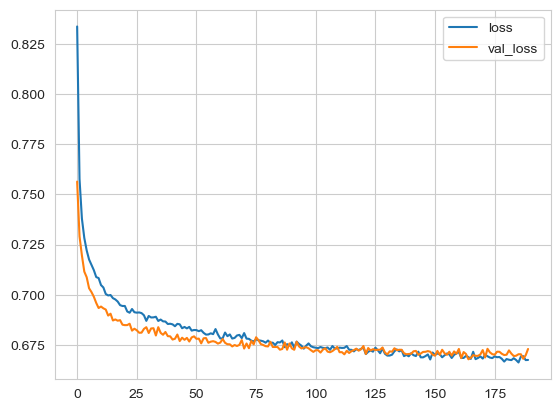

In [254]:
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot()

In [255]:
predictions = np.argmax(model.predict(X_validation), axis = -1)

529/529 [==============================] - 1s 2ms/step


In [256]:
# Classification report

print(classification_report(y_validation, predictions))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      9353
           1       0.58      0.67      0.62      3228
           2       0.70      0.63      0.67      4343

    accuracy                           0.70     16924
   macro avg       0.68      0.68      0.68     16924
weighted avg       0.71      0.70      0.70     16924



In [257]:
# Confusion matrix

pd.DataFrame(confusion_matrix(y_validation, predictions), columns = ['Predicted: 0','Predicted: 1', 'Predicted: 2'], index = ['Real: 0','Real: 1', 'Real: 2'])

,Predicted: 0,Predicted: 1,Predicted: 2
Real: 0,7008,1236,1109
Real: 1,1029,2151,48
Real: 2,1281,316,2746


The metrics showed by the Keras model is not good compared to our Random Forest mode, it has a pretty bad time dealing with 1's and it also predicted more 1 as 2 and 2 as 1 wrong. Since the point of the proyect was differentiate between good and bad credit score this Keras model is not a good solution for the problem, I could probably change some parameters and layers to make it better but it will be more expensive to deploy than the original Random Forest. So I have decided to go with Random Forest to solve the problem

## Solving the problem

### Training the final model

In [258]:
model = RandomForestClassifier(bootstrap = False, criterion = 'entropy', n_estimators = 400, 
                               max_depth = 30, min_samples_leaf = 3, min_samples_split = 4, n_jobs = -1)

For the final model since I have already tested cross validation there is no point in spliting the data, I can use the entire dataset to train de model.

In [259]:
# Scale the data.
scaler = MinMaxScaler()

ScaledX = scaler.fit_transform(X)

In [260]:
# Fit the model

model.fit(ScaledX, y)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30,
                       min_samples_leaf=3, min_samples_split=4,
                       n_estimators=400, n_jobs=-1)

### Feature Importance

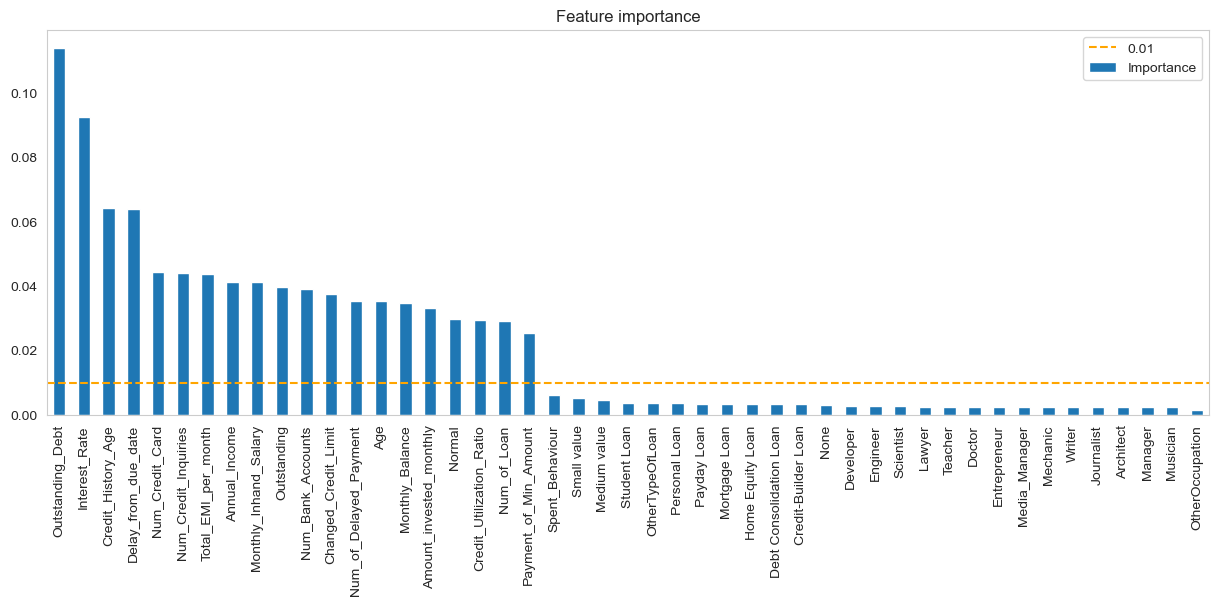

In [261]:
FeatureImportance = pd.DataFrame(index = test_data.columns)
FeatureImportance['Importance'] = model.feature_importances_
FeatureImportance.sort_values(by = 'Importance', ascending = False).plot(kind = 'bar', figsize = (15, 5))
plt.grid(False)
plt.title('Feature importance')
plt.axhline(0.01, linestyle = '--', color = 'orange', label = '0.01')
plt.legend();

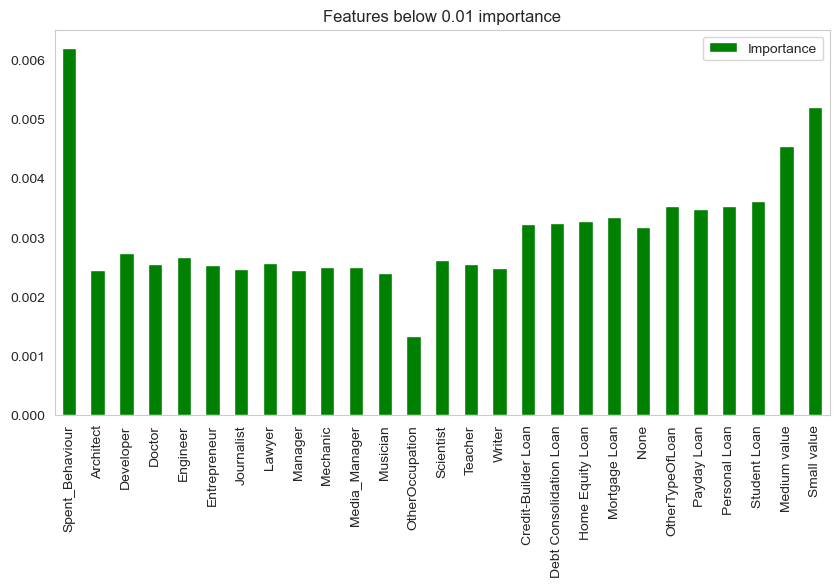

In [262]:
FeatureImportance[FeatureImportance['Importance'] < 0.01].plot(kind = 'bar', figsize = (10, 5), color = 'green')

plt.grid(False)
plt.title('Features below 0.01 importance');

I can see that my feature engineered variables did not perform as good as I expected to perform and most of the dummies identifiers (Loan and Occupation) did not have any importance. I tried by removing them and the model did not show any improvment so they are just "noise", I am gonna leave all of those feature to see it's performance in production.

# Visualize, report, and present the problem solving steps and final solution.

## Predicting the test data

I am gonna predict with the model the testing data given to me then I am gonna look at the statistics of the data I trained the model with and the statistics from the predictions made by the model in a dataset it has never seen before (Production data), since It does not have a target labeled I would have to see if the model describes the same patterns in the numbers.

In [263]:
TestScaledX = scaler.transform(X_test)

In [264]:
TestPredictions = model.predict(TestScaledX)

In [265]:
test_data['Predicted_Credit_Score'] = TestPredictions

In [266]:
TrainStats = train_data.groupby('Credit_Score')[test_data.columns[:18]].mean().transpose()

TrainStats.rename(columns = {0: '0 (Standard) Used for training',
                   1: '1 (Good) Used for training',
                   2: '2 (Poor) Used for training'},
          inplace = True, errors = 'raise')

In [267]:
TestStats = test_data.groupby('Predicted_Credit_Score')[test_data.columns[:18]].mean().transpose()

TestStats.rename(columns = {0: '0 (Standard) Predicted',
                   1: '1 (Good) Predicted',
                   2: '2 (Poor) Predicted'},
          inplace = True, errors = 'raise')

In [268]:
Stats = pd.concat([TrainStats, TestStats], axis = 1)
Stats['0 (Standard) Difference'] = Stats['0 (Standard) Used for training'] - Stats['0 (Standard) Predicted']
Stats['1 (Good) Difference'] = Stats['1 (Good) Used for training'] - Stats['1 (Good) Predicted']
Stats['2 (Poor) Difference'] = Stats['2 (Poor) Used for training'] - Stats['2 (Poor) Predicted']

cols = ['2 (Poor) Used for training', '2 (Poor) Predicted', '2 (Poor) Difference', '0 (Standard) Used for training', '0 (Standard) Predicted', 
        '0 (Standard) Difference', '1 (Good) Used for training', '1 (Good) Predicted', '1 (Good) Difference',]

Stats = Stats[cols]

Stats

,2 (Poor) Used for training,2 (Poor) Predicted,2 (Poor) Difference,0 (Standard) Used for training,0 (Standard) Predicted,0 (Standard) Difference,1 (Good) Used for training,1 (Good) Predicted,1 (Good) Difference
Age,31.24,31.10,0.14,32.98,32.94,0.04,35.32,34.96,0.35
Annual_Income,162340.06,148717.71,13622.35,183578.42,169634.66,13943.76,182383.87,198156.31,-15772.44
Monthly_Inhand_Salary,13528.34,12393.14,1135.20,15298.20,14136.22,1161.98,15198.66,16513.03,-1314.37
Num_Bank_Accounts,5.98,5.71,0.27,5.17,5.01,0.16,3.42,3.03,0.39
Num_Credit_Card,6.14,5.85,0.30,5.20,5.05,0.14,4.12,3.87,0.25
Interest_Rate,19.24,19.89,-0.65,13.10,12.09,1.01,7.63,6.65,0.98
Num_of_Loan,4.52,4.57,-0.06,3.14,2.85,0.29,2.19,2.04,0.15
Delay_from_due_date,27.78,27.44,0.34,18.68,17.11,1.57,10.71,9.03,1.68
Num_of_Delayed_Payment,14.21,14.03,0.18,12.28,12.05,0.23,7.84,6.83,1.01
Changed_Credit_Limit,10.59,10.64,-0.05,10.58,10.44,0.15,6.90,6.16,0.74


The statistics from the testing data hold the pattern from the training data, this means that model can really differentiate between 2 (Poor) and 1 (Good) credit score which was the main objective of the project. All the statistics show a pattern where some variable is lower in Poor credit score and higher in good credit score and vice versa. For example, younger people usually have poor credit score and older people usually have good credit score or poor creditors usually have worst interest rates while good creditors have better ones. Statictis hold, so the model did a pretty good job and I am satisfied with the results.

## Project Summary
### Did it solve the GFC problem?

From the final statistics is noticeable that the model predictions can really describe the data with a really good precision, since it is an unbalanced target there's gonna be some datapoints that were predicted as 0 (Standard) but I managed to reduced the amount of observations that were 1 (Good) and got predicted 2 (Poor) and vice-versa. Which was the main objective of the project, since predicting 1 (Good) and 2 (Poor) as 0 (Standard) was not a such a deal for the GFC, differentiate between Good and Poor credit score was the main goal. It would be a huge mistake and problem if the model predicted someone with poor credit score as having a good credit score and I worked focusing in minimazing those predictions and erros. I am satisfied with the results delivered and it satisfies the company goals. So in overall it solved the GFC Problem.


### Is there any room for improvement?

I tried training the model with and without engineered features and I found no difference. I also tried trainning the model without the features with little to no correlation and without outliers and there was no difference, the best performance model without overfitting was the one I showcased in the project together with the hyperparameters tunned, there could be room for improvement in the creation of new feature engineered variables and transformations (that might affect the model in production) or new valuable features to trained the model again. 

Random Forest with the hyperparameters tunned showed a model that describes the data with a good precision and can differentiate between the classes, having a low cost of implementation and a sustainable model overall.

# Supply or submit the results.

## Saving trained model

Since the trainned model is over 4.50Gb I will not upload it.

import _pickle as cPickle

with open('Trainned Model/RandomForestClassifier', 'wb') as f:

    cPickle.dump(model, f)                                                                                                                                                                                                    

To read/load the model:

with open('Trainned Model/RandomForestClassifier', 'rb') as f:
    
    model = cPickle.load(f)